#TelecomX_P2
Predicción de Cancelación de Clientes (Churn Prediction)
Este proyecto utiliza análisis de datos y modelos de machine learning para predecir qué clientes podrían abandonar una compañía de telecomunicaciones. Se ha desarrollado en Python utilizando pandas, scikit-learn y otras librerías del ecosistema de ciencia de datos.

##Carga Base Desde challange P1 TelecomX

### Carga de los datos  Proporcionados Originales
Estos vienen en formato Json los cuales seran tomados desde el directorio de trabajo y cargados en un DataFrame (df)

In [7]:
import pandas as pd

# Cargar directamente desde el archivo
df = pd.read_json('/content/TelecomX_Data.json')
# Normalizar las columnas anidadas
df = pd.json_normalize(df.to_dict(orient='records'), sep='_')
# Mostrar los primeros registros
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
import io
buffer = io.StringIO()
df.info(buf=buffer)
info_text = buffer.getvalue()
print(info_text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

###Transformación
Se reemplazaran todos los valores de 'YES' y 'NO' pro 1 y 0  respectivamente  ( se crea funcion para esto , tambien se desplegara df.info() para saber como quedaron los campos y una muestra aleatoria de ellos

Visializar los valores almacenados en los campos en busca de inconsistencias

In [9]:
print('Churn : ',df['Churn'].unique())
print('customer_Partner : ',df['customer_Partner'].unique())
print('customer_Dependents : ',df['customer_Dependents'].unique())

print('phone_PhoneService : ',df['phone_PhoneService'].unique())
print('phone_MultipleLines : ',df['phone_MultipleLines'].unique())

print('internet_OnlineBackup : ',df['internet_OnlineBackup'].unique())
print('internet_DeviceProtection : ',df['internet_DeviceProtection'].unique())
print('internet_TechSupport : ',df['internet_TechSupport'].unique())
print('internet_StreamingTV : ',df['internet_StreamingTV'].unique())
print('internet_StreamingMovies : ',df['internet_StreamingMovies'].unique())

print('account_PaperlessBilling : ',df['account_PaperlessBilling'].unique())

# conversion a String
print('customer_gender : ',df['customer_gender'].unique())
print('internet_InternetService : ',df['internet_InternetService'].unique())
print('account_Contract : ',df['account_Contract'].unique())
print('account_PaymentMethod : ',df['account_PaymentMethod'].unique())


# Verifique si hay valores únicos en cada columna
#for col in df_plano.columns:
#  print(f"valores únicos en la columna'{col}': {df_plano[col].nunique()}")
#  if df_plano[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
#    print(df_plano[col].unique())
#    print('-' * 50)  # Línea divisoria para mejor visualización

Churn :  ['No' 'Yes' '']
customer_Partner :  ['Yes' 'No']
customer_Dependents :  ['Yes' 'No']
phone_PhoneService :  ['Yes' 'No']
phone_MultipleLines :  ['No' 'Yes' 'No phone service']
internet_OnlineBackup :  ['Yes' 'No' 'No internet service']
internet_DeviceProtection :  ['No' 'Yes' 'No internet service']
internet_TechSupport :  ['Yes' 'No' 'No internet service']
internet_StreamingTV :  ['Yes' 'No' 'No internet service']
internet_StreamingMovies :  ['No' 'Yes' 'No internet service']
account_PaperlessBilling :  ['Yes' 'No']
customer_gender :  ['Female' 'Male']
internet_InternetService :  ['DSL' 'Fiber optic' 'No']
account_Contract :  ['One year' 'Month-to-month' 'Two year']
account_PaymentMethod :  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


conversion de  campos  normalizacion

In [10]:

df['phone_MultipleLines'] = df['phone_MultipleLines'].replace('No phone service', 'No')
df['internet_OnlineBackup'] = df['internet_OnlineBackup'].replace('No internet service', 'No')
df['internet_DeviceProtection'] = df['internet_DeviceProtection'].replace('No internet service', 'No')
df['internet_TechSupport'] = df['internet_TechSupport'].replace('No internet service', 'No')
df['internet_StreamingTV'] = df['internet_StreamingTV'].replace('No internet service', 'No')
df['internet_StreamingMovies'] = df['internet_StreamingMovies'].replace('No internet service', 'No')


VAlidacion de blancos y vacios

In [11]:
# Vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [12]:
#Es necesario analizar los 11 registros que tienen vacios o nulos  en el campo account_Charges_total  y los  224 que tienen ''  en el campo "churn"
df[df['account_Charges_Total'] == ' ']

# estos clientes  tienen el valor de "customer_ternure " = 0 , es decir no tienen un 1 en el sistema , por eso no tienen facturacion.

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [13]:
#Es necesario analizar los registros que tienen vacios o nulos  en el campo"churn"
df[df['Churn'] == '']

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No,No,No,No,No,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [14]:
# ya que no tienen  antigudad ni son una cantidad representativa se eliminaran del Dataframe
df = df[df['account_Charges_Total'] != ' ']
#validacion de la tarea de borrado  ejecutada
df[df['account_Charges_Total'] == ' ']

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [15]:
# se borran los registros
df = df[df['Churn'] != '']
#validacion de la tarea de borrado  ejecutada
df[df['Churn'] == '']

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [16]:
#Cambiando la columna "account_Charges_Total" a Float

df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [17]:
def convertir_yes_no_a_binario(df):
    df = df.copy()  # para no modificar el original

    conversiones_validas = [
        {'Yes', 'No'}, {'No', 'Yes'},
        {'yes', 'no'}, {'no', 'yes'},
        {'Si', 'No'}, {'No', 'Si'},
        {'si', 'no'}, {'no', 'si'},
        {'Sí', 'No'}, {'No', 'Sí'}  # si estás usando tildes
    ]

    for col in df.columns:
        if df[col].nunique() == 2:
            valores = set(df[col].dropna().unique())
            if valores in conversiones_validas:
                df[col] = df[col].map({
                    'Yes': 1, 'No': 0,
                    'yes': 1, 'no': 0,
                    'Si': 1, 'si': 1, 'Sí': 1,
                    'No': 0, 'no': 0
                })

    return df

In [18]:
#df = convertir_yes_no_a_binario(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Se buscaran valores nulos y se desplegaran

In [19]:
print(df.isna().sum()[df.isna().sum() > 0])
nan_rows = df[df.isna().any(axis=1)]
nan_rows


Series([], dtype: int64)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


Se buscan registros duplicdos

In [20]:
# registros duplicados  ( no existen)
print(f'la cantidad de duplicados es {df.duplicated().sum()}')

la cantidad de duplicados es 0


Visializar los valores almacenados en los campos en busca de inconsistencias

In [21]:
print('Churn : ',df['Churn'].unique())
print('customer_Partner : ',df['customer_Partner'].unique())
print('customer_Dependents : ',df['customer_Dependents'].unique())

print('phone_PhoneService : ',df['phone_PhoneService'].unique())
print('phone_MultipleLines : ',df['phone_MultipleLines'].unique())

print('internet_OnlineBackup : ',df['internet_OnlineBackup'].unique())
print('internet_DeviceProtection : ',df['internet_DeviceProtection'].unique())
print('internet_TechSupport : ',df['internet_TechSupport'].unique())
print('internet_StreamingTV : ',df['internet_StreamingTV'].unique())
print('internet_StreamingMovies : ',df['internet_StreamingMovies'].unique())

print('account_PaperlessBilling : ',df['account_PaperlessBilling'].unique())

# conversion a String
print('customer_gender : ',df['customer_gender'].unique())
print('internet_InternetService : ',df['internet_InternetService'].unique())
print('account_Contract : ',df['account_Contract'].unique())
print('account_PaymentMethod : ',df['account_PaymentMethod'].unique())

Churn :  ['No' 'Yes']
customer_Partner :  ['Yes' 'No']
customer_Dependents :  ['Yes' 'No']
phone_PhoneService :  ['Yes' 'No']
phone_MultipleLines :  ['No' 'Yes']
internet_OnlineBackup :  ['Yes' 'No']
internet_DeviceProtection :  ['No' 'Yes']
internet_TechSupport :  ['Yes' 'No']
internet_StreamingTV :  ['Yes' 'No']
internet_StreamingMovies :  ['No' 'Yes']
account_PaperlessBilling :  ['Yes' 'No']
customer_gender :  ['Female' 'Male']
internet_InternetService :  ['DSL' 'Fiber optic' 'No']
account_Contract :  ['One year' 'Month-to-month' 'Two year']
account_PaymentMethod :  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Generacion de campo en el DataFrame df cuenta diaria a partir del campo cargos mensuales

In [22]:
df['cuenta_diaria'] = df['account_Charges_Monthly'] /30
df.sample(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,cuenta_diaria
3955,5397-TUPSH,No,Male,1,Yes,No,65,Yes,No,Fiber optic,...,No,No,No,No,One year,Yes,Bank transfer (automatic),70.95,4555.20,2.365000
3226,4504-YOULA,No,Female,0,Yes,Yes,35,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),59.45,2136.90,1.981667
6157,8429-XIBUM,Yes,Male,0,No,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.35,2317.10,3.378333
1949,2761-OCIAX,Yes,Male,1,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.40,2.490000
2446,3413-CSSTH,No,Male,0,No,No,41,Yes,Yes,DSL,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.70,2237.55,1.856667


### conversion de DataFrame  en archivo .csv y exportacion

In [23]:
df.to_csv('TelecomX_clientes_churn.csv', index=False)

#**TelecomX P2  Challange**

## Librerias

In [24]:
# Carga de librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
import warnings
warnings.filterwarnings('ignore')



from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Versiones de Librerias
print(f'numpy=={np.__version__}')
print(f'pandas=={pd.__version__}')
print(f'matplotlib=={matplotlib.__version__}')
print(f'seaborn=={sns.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'imblearn=={sklearn.__version__}')

numpy==2.0.2
pandas==2.2.2
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1
imblearn==1.6.1


##**Analisis Exploratorio**

##Procesaminto de Datos

###Cargar archivo desde Challange Anterior

In [82]:
# Cargar directamente desde el archivo
df = pd.read_csv('/content/TelecomX_clientes_churn.csv')

# Mostrar los primeros registros
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Borrado de Columnas no relevantes para analisis

In [27]:
df.drop(columns=['customerID','cuenta_diaria'], inplace=True)
df.sample(8)

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
4662,No,Male,0,No,No,17,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),106.65,1672.10
2425,No,Female,0,No,No,28,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,54.30,1546.30
4993,Yes,Male,1,Yes,No,17,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.45,1622.45
4829,Yes,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.60
6007,Yes,Female,1,No,No,13,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,1308.10
3874,No,Male,0,Yes,Yes,69,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.65,5542.55
6173,No,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No,No,No,No,No,Two year,No,Credit card (automatic),24.80,1874.30
403,Yes,Male,0,Yes,No,14,No,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.35,667.70


## Encoding
Transformar las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Se utilizara el método Onehotencoding.

In [28]:
# Verifica el tipo de datos de tus columnas
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

# Codificador
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols )
],    remainder='passthrough'  # Deja pasar columnas numéricas
)


In [29]:
df_encoded_array = preprocessor.fit_transform(df)

# Obtener nombres de columnas one-hot
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)

# Combinar con las columnas numéricas
all_columns = list(ohe_columns) + num_cols

# Crear nuevo DataFrame
datos = pd.DataFrame(df_encoded_array, columns=all_columns)
datos = datos.apply(pd.to_numeric, errors='ignore')
datos.head()

,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_Yes,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,...,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,65.6,593.30
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.9,542.40
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,73.9,280.85
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,13.0,98.0,1237.85
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,83.9,267.40


##Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [30]:
# Supongamos que tienes una columna llamada 'Churn_Yes'
conteo_abs = datos['Churn_Yes'].value_counts()
conteo_rel = datos['Churn_Yes'].value_counts(normalize=True)

# Combinar en un solo DataFrame
tabla = pd.DataFrame({
    'Clase': conteo_abs.index.map({0: 'Activo', 1: 'Churn'}),
    'Cantidad': conteo_abs.values,
    'Proporción': conteo_rel.values
})
# Reordenar columnas (opcional)
tabla = tabla[['Clase', 'Cantidad', 'Proporción']]
tabla['Proporción (%)'] = (tabla['Proporción'] * 100).round(1)
tabla = tabla[['Clase', 'Cantidad', 'Proporción (%)']]

# Mostrar la tabla
print(tabla)

    Clase  Cantidad  Proporción (%)
0  Activo      5163            73.4
1   Churn      1869            26.6


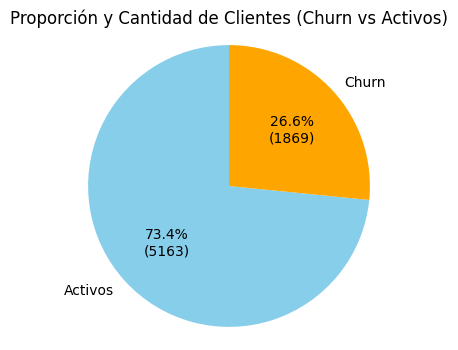

In [31]:
# Valores absolutos y proporciones
valores_abs = datos['Churn_Yes'].value_counts()
valores_prop = datos['Churn_Yes'].value_counts(normalize=True)
etiquetas = valores_abs.index.map({0: 'Activos', 1: 'Churn'})

# Función personalizada para mostrar porcentaje + cantidad
def formato_autopct(pct, allvals):
    total = sum(allvals)
    valor_abs = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({valor_abs})'

# Gráfico de torta
plt.figure(figsize=(4,4))
plt.pie(valores_abs,
        labels=etiquetas,
        autopct=lambda pct: formato_autopct(pct, valores_abs),
        startangle=90,
        colors=['skyblue', 'orange'])

plt.title('Proporción y Cantidad de Clientes (Churn vs Activos)')
plt.axis('equal')
plt.show()


##Normalización o Estandarización

Proceso de transformación de variables numéricas para que estén en una escala comparable, entre si , haciendo una revision de nuestro dataFrame ,  

In [32]:
datos.sample(3)

,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_Yes,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,...,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
4461,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,49.9,130.1
5751,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.0,79.8,1001.2
3913,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,21.0,103.9,2254.2


Nos damos cuenta que existen  los campos

*   customer_tenure
*   account_Charges_Monthly
*   account_Charges_Total

que pueden ser normalizados para hacer este analisis los observaremos en detalle

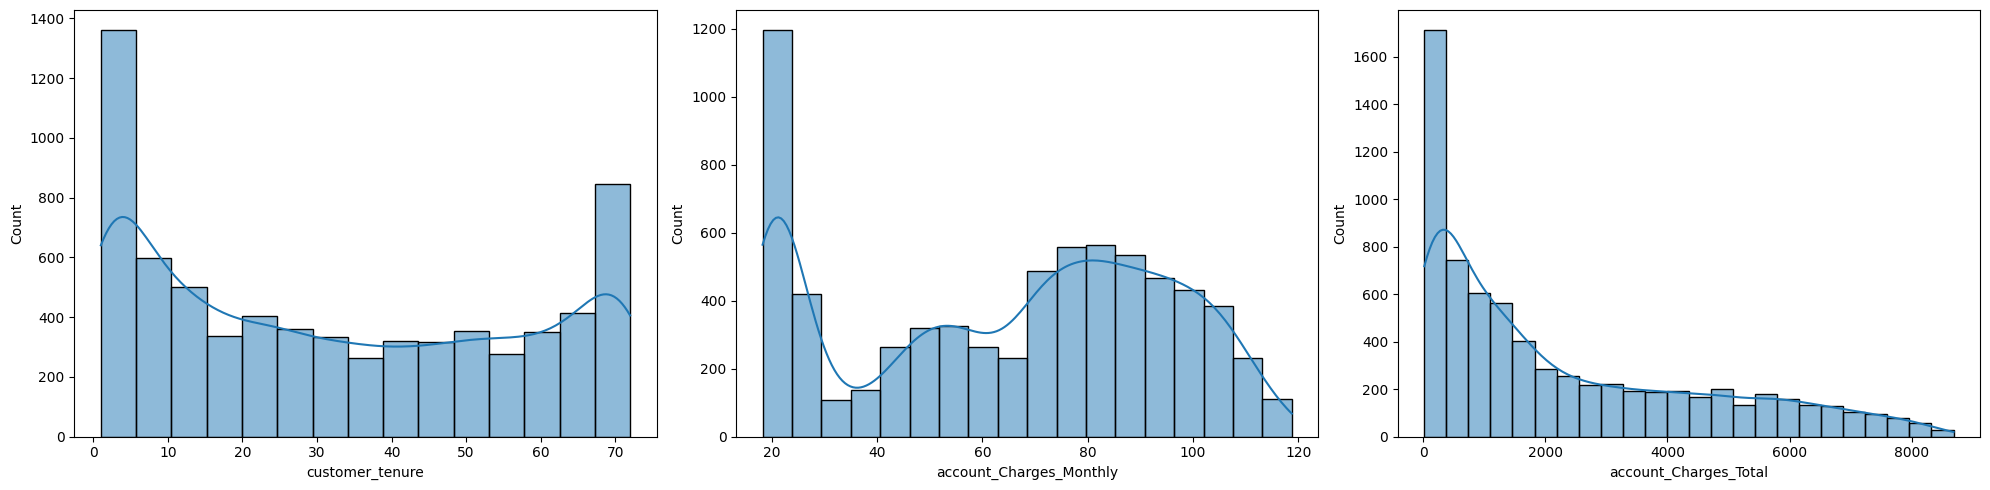

In [33]:
#    graficamos  unos histogramas de cada uno de ellos
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

# Crear figura con 2 filas y 2 columnas
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 2x2 con tamaño más grande

# --- Gráfico 1: Histograma del tiempo de permanencia ---
binwidth = ancho_bin(datos,'customer_tenure')
if not np.isfinite(binwidth) or binwidth <= 0:
    binwidth = 1  # o el valor que tenga más sentido
sns.histplot(data=datos, x='customer_tenure', kde=True, binwidth=binwidth, ax=axes[0])

binwidth = ancho_bin(datos, 'account_Charges_Monthly')
if not np.isfinite(binwidth) or binwidth <= 0:
    binwidth = 1  # o el valor que tenga más sentido
sns.histplot(data=datos, x='account_Charges_Monthly', kde=True, binwidth=binwidth, ax=axes[1])

binwidth = ancho_bin(datos, 'account_Charges_Total')
if not np.isfinite(binwidth) or binwidth <= 0:
    binwidth = 1  # o el valor que tenga más sentido
sns.histplot(data=datos, x='account_Charges_Total', kde=True, binwidth=binwidth, ax=axes[2])

plt.tight_layout()
plt.show()

In [34]:
#analizamos un describe()
resumen = datos[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']].describe()
resumen_formateado = resumen.applymap(lambda x: f"${x:,.2f}")
print(resumen_formateado)

      customer_tenure account_Charges_Monthly account_Charges_Total
count       $7,032.00               $7,032.00             $7,032.00
mean           $32.42                  $64.80             $2,283.30
std            $24.55                  $30.09             $2,266.77
min             $1.00                  $18.25                $18.80
25%             $9.00                  $35.59               $401.45
50%            $29.00                  $70.35             $1,397.47
75%            $55.00                  $89.86             $3,794.74
max            $72.00                 $118.75             $8,684.80


In [81]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Crear la figura con 1 fila y 3 columnas
fig = make_subplots(rows=1, cols=3, subplot_titles=[
    'Tiempo de Permanencia vs Churn',
    'Cargos Mensuales vs Churn',
    'Cargos Totales vs Churn'
])

# Boxplot 1: Tiempo de permanencia
fig1 = px.box(datos, x='customer_tenure', y='Churn_Yes', color='Churn_Yes', orientation='h')
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Boxplot 2: Cargos mensuales
fig2 = px.box(datos, x='account_Charges_Monthly', y='Churn_Yes', color='Churn_Yes', orientation='h')
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Boxplot 3: Cargos totales
fig3 = px.box(datos, x='account_Charges_Total', y='Churn_Yes', color='Churn_Yes', orientation='h')
for trace in fig3.data:
    fig.add_trace(trace, row=1, col=3)

# Ajustes generales
fig.update_layout(
    height=500,
    width=1000,
    title_text="Distribución de Variables Clave vs Churn",
    showlegend=False,
    template='plotly_white'
)

fig.show()


**Analisis de los graficos**

**Grafico Tiempo de Permanencia vs Churn (izquierda)**
*   Los clientes que cancelan tienen una permanencia corta, centrada en torno a los 10-20 meses.
*   Los clientes activos presentan una mayor dispersión, con valores que se extienden hasta más de 60 meses.

**Estrategia:**
*     Los clientes con menor antigüedad son más propensos a cancelar se suguiere implementar estrategias de fidelización en los primeros meses.

**Grafico Cargos Mensuales vs Churn (centro)**

*   Los clientes que se dan de baja suelen tener cargos mensuales más altos
*   Hay una diferencia clara entre las medianas: los que cancelan pagan más.
*   Cargos mensuales elevados podrían estar generando insatisfacción.

**Estrategia:**
*   revisar si estos planes de alto costo están entregando suficiente valor.

**Grafico Cargos Totales vs Churn (derecha)**
*   Aunque los cargos mensuales son más altos para los que cancelan, los cargos totales son menores, ya que llevan poco tiempo como clientes.

*   Hay más outliers entre los que cancelan, lo que sugiere algunos casos extremos de clientes que pagaron mucho y aún así cancelaron.

**Estrategia:**

*   Los que cancelan han generado menos ingresos acumulados.
*   Retener clientes en etapas tempranas puede aumentar el valor total que generan.

**En resumen**

Estos tres gráficos revelan un patrón claro:

*   Los clientes que cancelan tienden a tener poca antigüedad, cargos mensuales altos y bajo valor total acumulado.

*   Esto entrega indicadores valiosos para estrategias de retención, por ejemplo:

*   Ofrecer beneficios durante los primeros 3–6 meses.

*   Revisar los planes de precios más altos.

*   Identificar y asistir a clientes con cargos altos y baja antigüedad (alto riesgo de churn).

 **En detalle cada una de la variables**

ademas de la impeccion grafica utilizamos ***skewness ***

El sesgo o skewness mide cuánto se desvía una distribución de la simetría. Es decir, si los datos se concentran más en un lado del gráfico que en el otro.

*   Skewness positivo: la cola es más larga hacia la derecha.
*   Skewness negativo: la cola es más larga hacia la izquierda.
*   Skewness ≈ 0: distribución simétrica (normal).


**Skewness:**
*  Te ayuda a decidir si necesitas transformar variables antes de aplicar ciertos modelos. Por ejemplo: modelos como regresión logística asumen variables con distribución normal → si hay skewness fuerte, podrías aplicar log() o Box-Cox.

**Outliers:**
* Pueden distorsionar el análisis, especialmente la media y modelos sensibles a valores extremos como KNN. A veces se eliminan o se tratan (por ejemplo, usando RobustScaler en vez de StandardScaler).

* También pueden darte pistas sobre grupos de alto riesgo: por ejemplo, clientes que cancelan y que tienen cargos muy altos.

**Analisis de  customer_tenure con distintos metodos de Normalizacion**

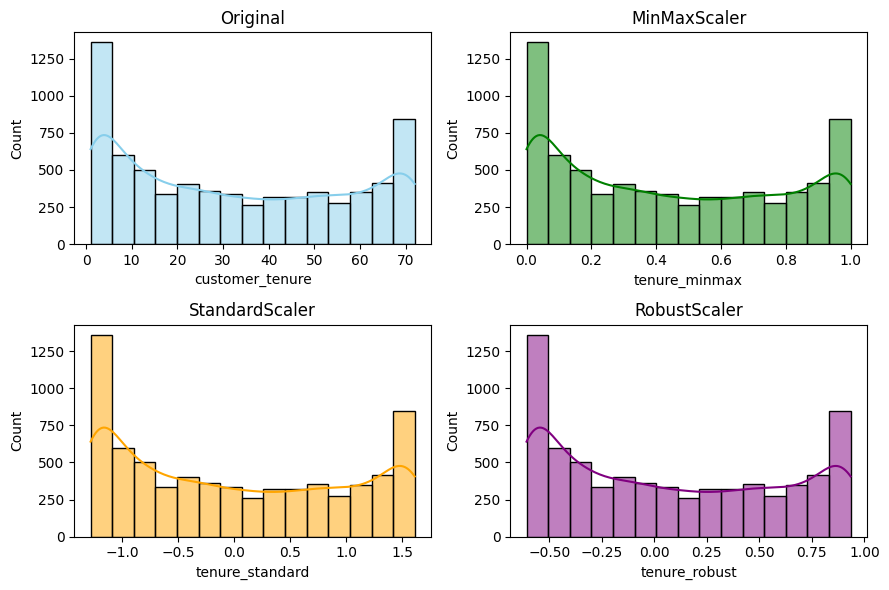

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Crear copias normalizadas
minmax = MinMaxScaler().fit_transform(datos[['customer_tenure']])
standard = StandardScaler().fit_transform(datos[['customer_tenure']])
robust = RobustScaler().fit_transform(datos[['customer_tenure']])

# Agregar al DataFrame para comparación
datos['tenure_minmax'] = minmax
datos['tenure_standard'] = standard
datos['tenure_robust'] = robust

fig, axes = plt.subplots(2, 2, figsize=(9, 6))
sns.histplot(datos['customer_tenure'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Original')

sns.histplot(datos['tenure_minmax'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('MinMaxScaler')

sns.histplot(datos['tenure_standard'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('StandardScaler')

sns.histplot(datos['tenure_robust'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('RobustScaler')

plt.tight_layout()
plt.show()

In [37]:
# Antes de aplicar escaladores, es clave saber si account_Charges_Monthly tiene sesgo (skewness) o outliers.
print("Skew de Customer_tenure:", datos['customer_tenure'].skew())

Skew de Customer_tenure: 0.23773083190513133


este  analisis nos permite definir que el modelo a aplicar correspomnde a StandardScaler

**Analisis de  account_Charges_Monthly**

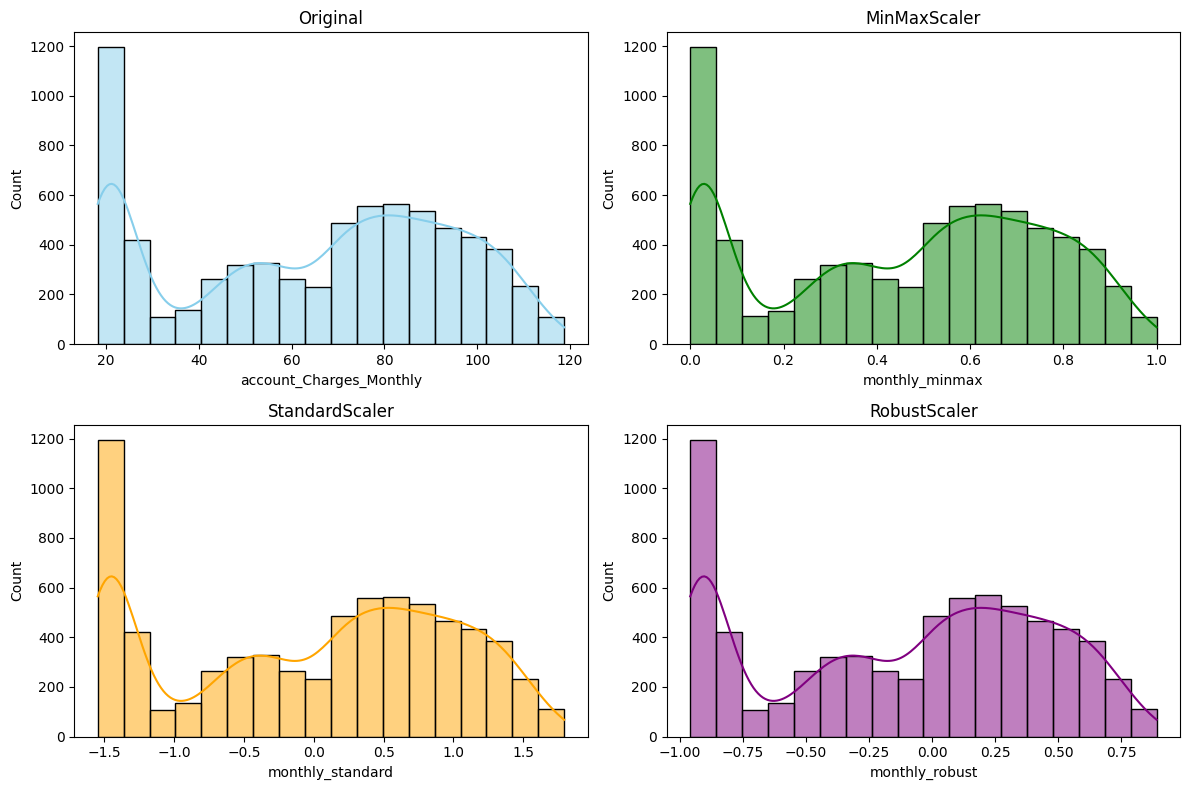

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Aplicar escaladores
minmax = MinMaxScaler().fit_transform(datos[['account_Charges_Monthly']])
standard = StandardScaler().fit_transform(datos[['account_Charges_Monthly']])
robust = RobustScaler().fit_transform(datos[['account_Charges_Monthly']])

# Guardar en el DataFrame
datos['monthly_minmax'] = minmax
datos['monthly_standard'] = standard
datos['monthly_robust'] = robust

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(datos['account_Charges_Monthly'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Original')

sns.histplot(datos['monthly_minmax'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('MinMaxScaler')

sns.histplot(datos['monthly_standard'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('StandardScaler')

sns.histplot(datos['monthly_robust'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('RobustScaler')

plt.tight_layout()
plt.show()


In [39]:
# Antes de aplicar escaladores, es clave saber si account_Charges_Monthly tiene sesgo (skewness) o outliers.
print("Skew de account_Charges_Monthly:", datos['account_Charges_Monthly'].skew())

Skew de account_Charges_Monthly: -0.22210292770166232


Este  analisis nos permite definir que el modelo a aplicar correspomnde a StandardScaler

**Analisis grafico para 'account_Charges_Total', con distintos metodos normalizacion**

In [40]:
# Antes de aplicar escaladores, es clave saber si account_Charges_Monthly tiene sesgo (skewness) o outliers.
print("Skew de account_Charges_Total:", datos['account_Charges_Total'].skew())

Skew de account_Charges_Total: 0.961642499724251


para este campo se aplicara normalizacion logaritmica  y luego se aplicara  StandardScaler

Una  vez revisados los  campos numericos y analizados sus graficos se recomienda realizar las siguientes normalizaciones


*   'customer_tenure'          **StandardScaler**,	        Tiene rango amplio (0–72), y afecta distancia/pesos.

*   'account_Charges_Monthly',	**StandardScaler**,	  Diferencias fuertes entre cargos bajos y altos.

*   'account_Charges_Total',  **Log** y **StandardScaler**,	  Escala muy asimétrica y valores extremos.


Primero aplicaremos  una logaritmica  a account_Charges_Total



In [41]:
# Logarítmica
datos['account_Charges_Total_log'] = np.log1p(datos['account_Charges_Total'])

despues una normalizacion  StandarScaler() a los campos  'customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total_log'

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos[['customer_tenure_scaled', 'account_Charges_Monthly_scaled', 'account_Charges_Total_scaled','account_Charges_Total_log_scaled']] = scaler.fit_transform(
    datos[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total','account_Charges_Total_log']]
)

visializacion de  normalizacion  campo 'account_Charges_Total_log'

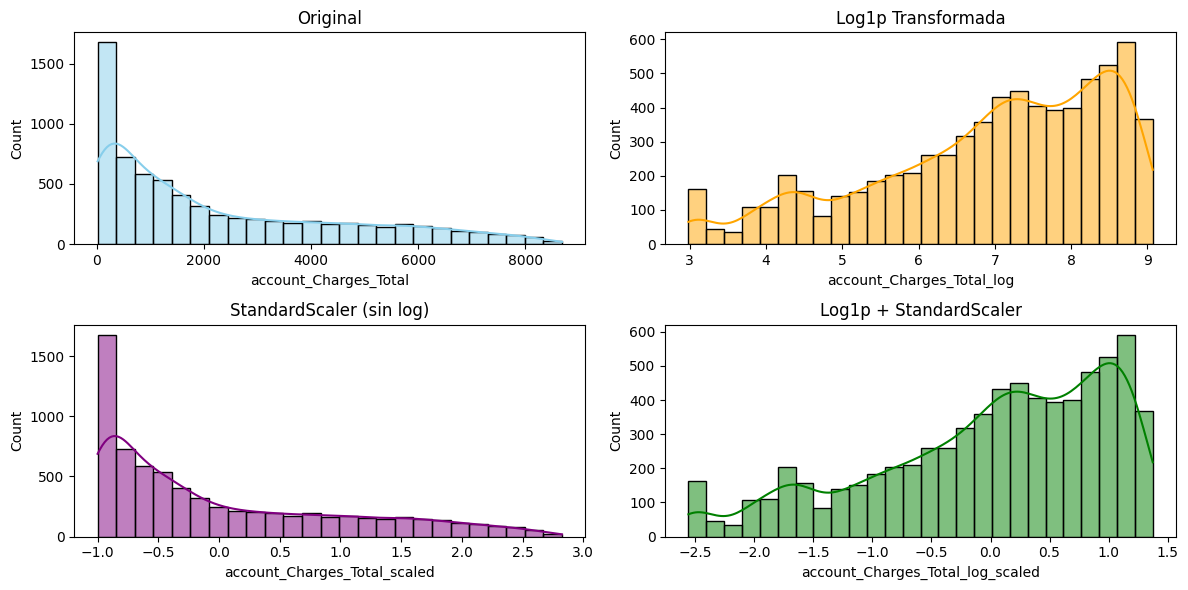

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# 1. Original
sns.histplot(datos['account_Charges_Total'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Original")

# 2. Logarítmica
sns.histplot(datos['account_Charges_Total_log'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Log1p Transformada")

# 3. Solo escalada
sns.histplot(datos['account_Charges_Total_scaled'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title("StandardScaler (sin log)")

# 4. Log + escalado
sns.histplot(datos['account_Charges_Total_log_scaled'], kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title("Log1p + StandardScaler")

plt.tight_layout()
plt.show()


In [44]:
datos.sample(4)

,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_Yes,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,...,tenure_standard,tenure_robust,monthly_minmax,monthly_standard,monthly_robust,account_Charges_Total_log,customer_tenure_scaled,account_Charges_Monthly_scaled,account_Charges_Total_scaled,account_Charges_Total_log_scaled
4857,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.612573,0.934783,0.943781,1.605573,0.787655,9.017908,1.612573,1.605573,2.631771,1.341578
1055,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.220905,-0.043478,0.508458,0.151304,-0.018425,7.564394,-0.220905,0.151304,-0.157063,0.401601
1354,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.995040,-0.456522,0.017413,-1.489112,-0.927683,4.960044,-0.995040,-1.489112,-0.944891,-1.282615
563,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.709833,-0.304348,0.018408,-1.485788,-0.925841,5.715217,-0.709833,-1.485788,-0.873926,-0.794249



#**Correlación y Selección de Variables**


###Análisis de Correlación

In [45]:
# Calcular correlación
correlaciones = datos.corr()

# Extraer solo la fila (o columna) de Churn_Yes y ordenarla
correlacion_churn = correlaciones['Churn_Yes'].drop('Churn_Yes')  # evitar correlación consigo mismo
correlacion_churn_ordenada = correlacion_churn.sort_values(ascending=False)
# Mostrar
print("Correlación de variables con Churn_Yes (ordenadas):")
print(correlacion_churn_ordenada)

Correlación de variables con Churn_Yes (ordenadas):
internet_InternetService_Fiber optic             0.307463
account_PaymentMethod_Electronic check           0.301455
monthly_minmax                                   0.192858
account_Charges_Monthly_scaled                   0.192858
monthly_standard                                 0.192858
account_Charges_Monthly                          0.192858
monthly_robust                                   0.192858
account_PaperlessBilling_Yes                     0.191454
customer_SeniorCitizen                           0.150541
internet_StreamingTV_Yes                         0.063254
internet_StreamingMovies_Yes                     0.060860
phone_MultipleLines_Yes                          0.040033
phone_PhoneService_Yes                           0.011691
customer_gender_Male                            -0.008545
internet_DeviceProtection_Yes                   -0.066193
internet_OnlineBackup_Yes                       -0.082307
account_PaymentMetho

**Variables más positivamente correlacionadas con Churn** (más propensos a cancelar):

**Variable 	Correlación**

* account_PaymentMethod_Electronic check	+0.30
* account_Charges_Monthly	+0.19
* account_PaperlessBilling_Yes	+0.19
* customer_SeniorCitizen	+0.15

**Interpretación**:

* Clientes con Internet por fibra óptica, pago electrónico y factura electrónica son más propensos a cancelar.
* Los clientes mayores también tienen más probabilidad de churn.
* Cargos mensuales altos se asocian con cancelación.

Estas variables deberían ser incluidas en el modelo y también destacadas en visualizaciones.

**Variables más negativamente correlacionadas con Churn** (más fieles o retenidos):

Variable	Correlación
* customer_tenure	–0.35
* account_Contract_Two year	–0.30
* account_Charges_Total_log	–0.24
* internet_InternetService_No	–0.23
* account_Contract_One year	–0.17
* internet_OnlineSecurity_Yes	–0.17

**Interpretación**:

* Clientes antiguos (más tenure) y con contrato largo son más fieles.
* Los que pagaron más total, aunque con menos mensualidad, también cancelan menos.
* Tener seguridad online y no usar Internet también está asociado a mayor retención.
* Estas variables pueden ser útiles para segmentar a clientes fieles o construir un modelo con predicción negativa (quién no cancela)


Para trabajar con un modelo mas acotado se eliminaran de la tabla  los que el modulo de  correlacion  sea menor al 15.

###**VIF**

El Variance Inflation Factor  es una métrica que se utiliza para detectar multicolinealidad entre las variables independientes en un modelo de regresión. Si hay multicolinealidad alta, puede afectar negativamente la interpretación del modelo y la estabilidad de los coeficientes.

El VIF mide cuánto aumenta la varianza de los coeficientes de un modelo debido a la colinealidad entre las variables independientes.

Si una variable está altamente correlacionada con otras, su VIF será alto.

VIF se calcula individualmente para cada variable.

**VIF	Significado**

1	: No hay colinealidad

Mayor 1 y Menor 5 :	Colinealidad moderada (aceptable)

Mayor a 5	: Colinealidad alta (posiblemente problemático)

Mayor a 10	: Colinealidad severa (debe investigarse o excluirse)

In [46]:
# Crear un DataFrame con solo las variables predictoras
X = datos.drop(columns='Churn_Yes')

# Añadir constante para intercepto (requerido por statsmodels)
X_const = sm.add_constant(X)

# Calcular VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # +1 por la constante
print(vif.sort_values('VIF', ascending=True))

                                         Variable         VIF
0                            customer_gender_Male    1.002225
20                         customer_SeniorCitizen    1.153332
16                   account_PaperlessBilling_Yes    1.208495
2                         customer_Dependents_Yes    1.383064
1                            customer_Partner_Yes    1.465469
17  account_PaymentMethod_Credit card (automatic)    1.561089
14                      account_Contract_One year    1.635221
19             account_PaymentMethod_Mailed check    1.857863
18         account_PaymentMethod_Electronic check    1.980015
15                      account_Contract_Two year    2.697445
8                     internet_OnlineSecurity_Yes    6.345165
11                       internet_TechSupport_Yes    6.485407
9                       internet_OnlineBackup_Yes    6.800971
10                  internet_DeviceProtection_Yes    6.931135
4                         phone_MultipleLines_Yes    7.303929
12      

Segun este analisis deben eliminarse las siguientes VAriables

*   inf  (*)
*   Variables duplicadas o transformadas dejando una.
*   Variables categóricas redundantes parte del mismo conjunto de One Hot Encoding.
*   Variables con VIF muy alto y bajo aporte predictivo:


(*) inf una variable está perfectamente explicada por una combinación lineal de otras variables, es decir, tiene colinealidad total o casi total


###Matriz de correlacion

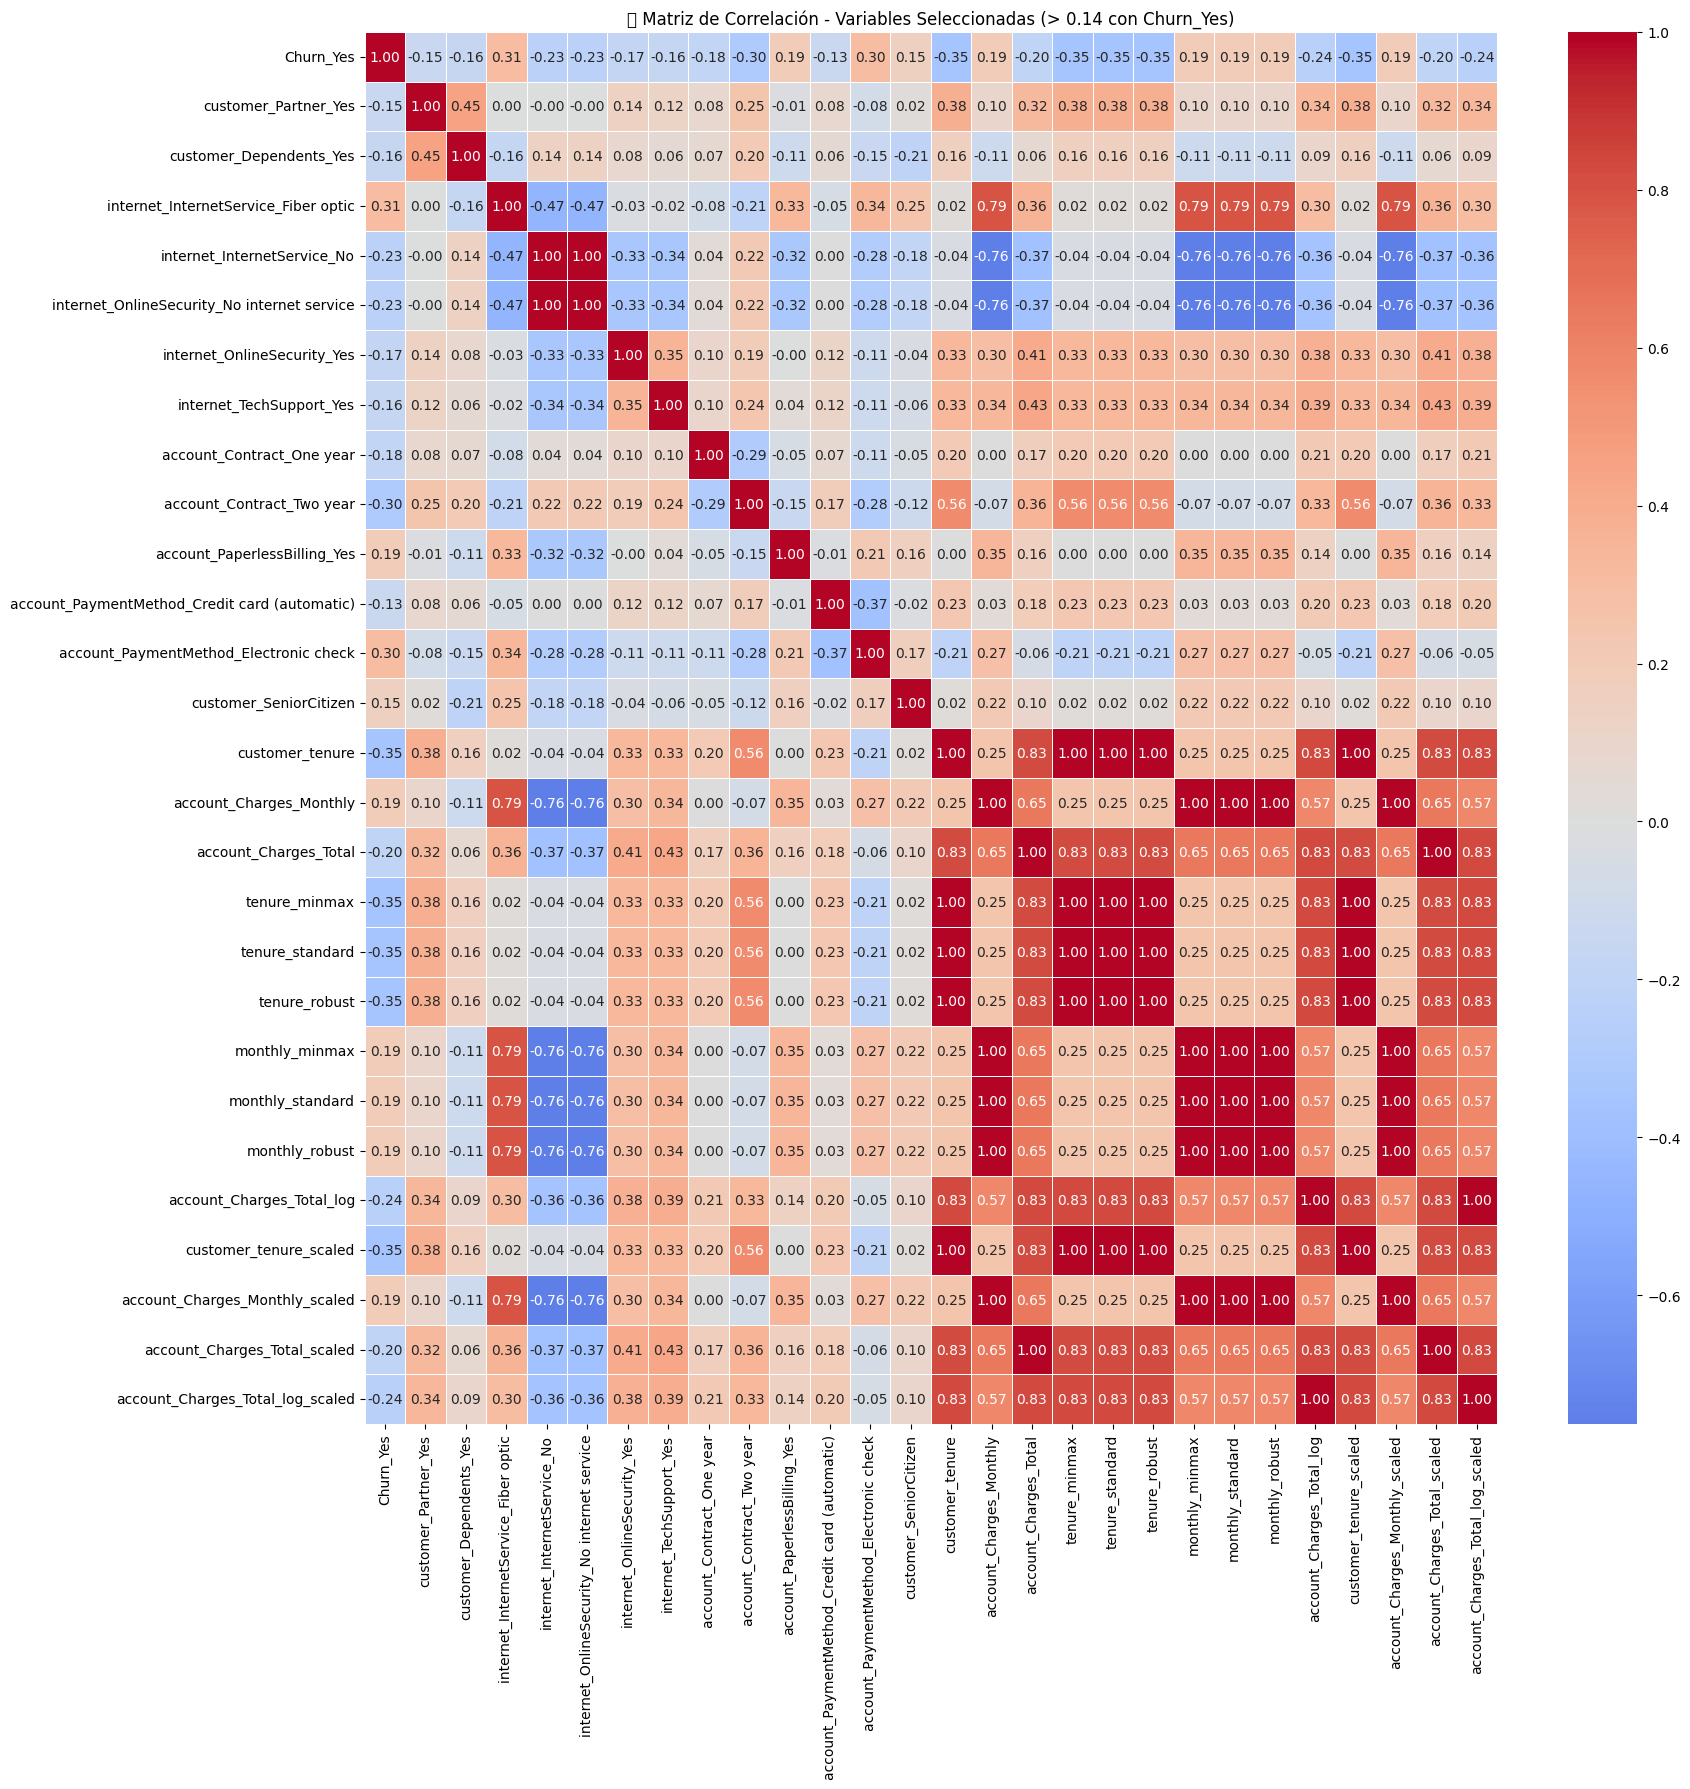

In [47]:
columnas = correlaciones.loc['Churn_Yes'].abs()[correlaciones.loc['Churn_Yes'].abs() > 0.1].index
corr_selected = correlaciones[columnas].loc[columnas]  # Submatriz de correlación filtrada

plt.figure(figsize=(18, 18))
sns.heatmap(corr_selected, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("🔍 Matriz de Correlación - Variables Seleccionadas (> 0.14 con Churn_Yes)")
plt.tight_layout()
plt.show()

**1. Variables más correlacionadas con Churn_Yes**
Estas son las que más se relacionan con la cancelación de clientes, por lo tanto, deberían priorizarse en modelos predictivos:

**Variable**
**internet_InternetService_Fiber optic**	+0.31	Los usuarios con fibra óptica tienden a cancelar más.
**account_PaymentMethod_Electronic check**	+0.30	Los que pagan con cheque electrónico cancelan más.
**account_PaperlessBilling_Yes**	+0.19	Facturación sin papel está levemente asociada a mayor churn.
**account_Charges_Monthly / _scaled**	+0.19	A mayor cargo mensual, más cancelación.
**customer_SeniorCitizen	+0.15**	Los clientes mayores cancelan más.

**customer_tenure / _scaled**	–0.35	Cuanto más tiempo lleva un cliente, menos cancela.

**account_Contract_Two year**–0.30	Contratos largos (2 años) retienen más clientes.

**account_Charges_Total_log / _scaled**	–0.24	Clientes con mayores cargos acumulados cancelan menos.


**2. Relaciones entre variables**
Esto ayuda a evitar la multicolinealidad y comprender qué variables están relacionadas entre sí:

* account_Charges_Total_log y customer_tenure: muy correlacionadas (+0.83).

* Tiene sentido: a mayor tiempo de permanencia, más cargos acumulados.

En modelos sensibles a colinealidad (como regresiones), podrías elegir solo una de las dos.

*_scaled tienen exactamente la misma correlación que sus versiones originales, lo cual es esperado: la normalización no cambia la relación lineal, solo la escala.

**Sugerencias para modelado**

** Variables candidatas fuertes para predecir churn:**
* customer_tenure

* internet_InternetService_Fiber optic

* account_PaymentMethod_Electronic check

* account_Contract_Two year

* account_Charges_Monthly

* account_PaperlessBilling_Yes

** Variables con muy baja o nula correlación con Churn_Yes:**
* phone_PhoneService_Yes,
* customer_gender_Male,
* internet_DeviceProtection_Yes...

tienen correlación cercana a 0, lo cual indica poco valor predictivo individual.

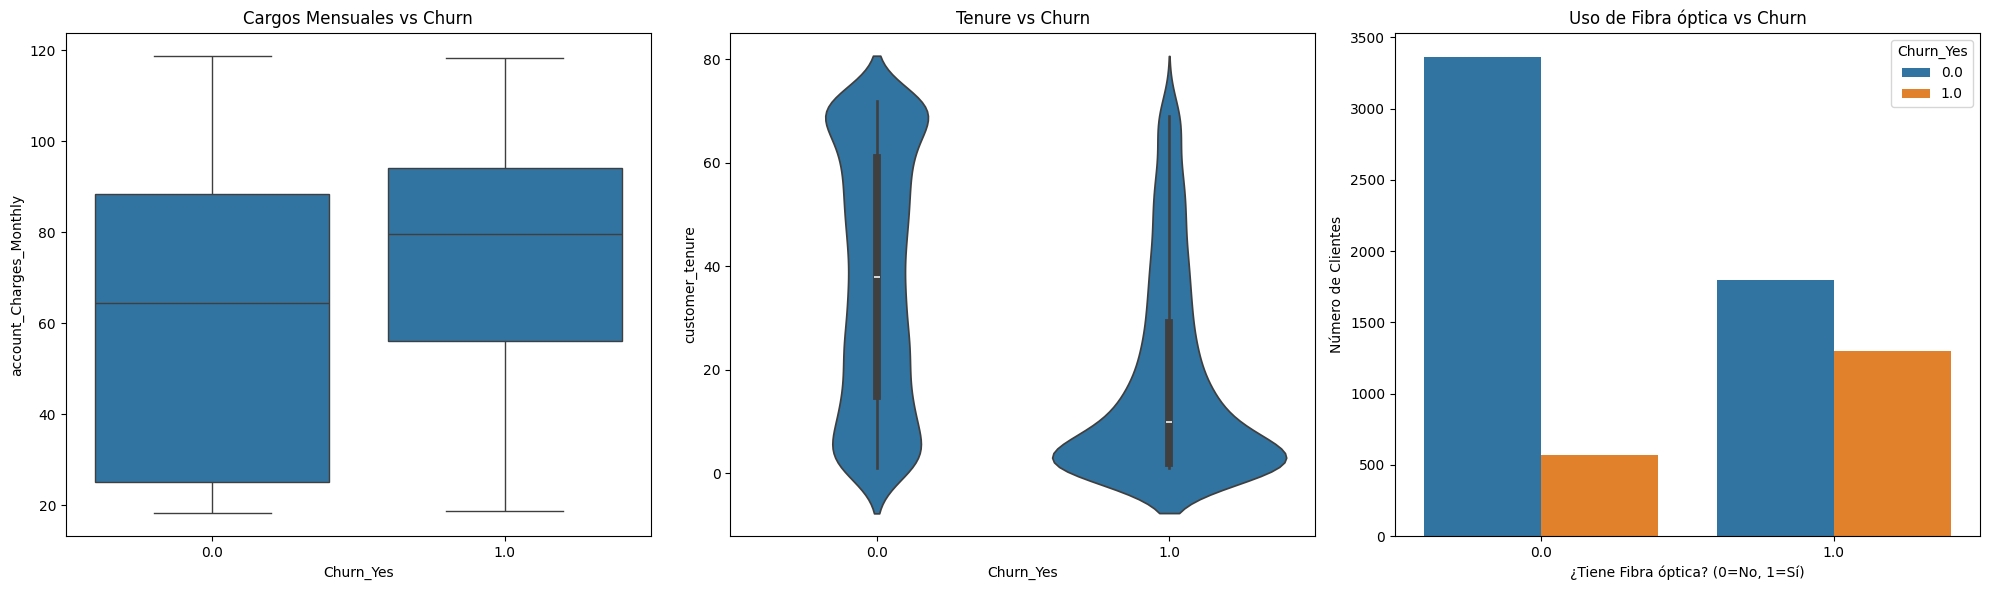

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# Boxplot para Charges Monthly
sns.boxplot(data=datos, x='Churn_Yes', y='account_Charges_Monthly', ax=axes[0])
axes[0].set_title('Cargos Mensuales vs Churn')

# Violinplot para Tenure
sns.violinplot(data=datos, x='Churn_Yes', y='customer_tenure', ax=axes[1])
axes[1].set_title('Tenure vs Churn')


sns.countplot(data=datos, x='internet_InternetService_Fiber optic', hue='Churn_Yes', ax=axes[2])
axes[2].set_title('Uso de Fibra óptica vs Churn')
axes[2].set_xlabel('¿Tiene Fibra óptica? (0=No, 1=Sí)')
axes[2].set_ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

**1. account_Charges_Monthly_scaled vs Churn_Yes (Boxplot)**

**Eje Y:** el valor de cargos mensuales (escalado).

**Eje X**: estado del cliente (0 = Activo, 1 = Churn).

* La caja representa el 50% central de los valores (Q1 a Q3).

* La línea central es la mediana.

* Los puntos extremos son outliers.


Si la mediana de los Churn (1) es más alta que la de los activos,significa que quienes pagan más mensualmente tienden a cancelar más.

Esto confirma la correlación positiva (+0.19).

**2. customer_tenure_scaled vs Churn_Yes (Violinplot)**

La forma de la "violín" indica dónde se concentran los clientes.

Si el violín del grupo Churn (1) es más delgado hacia valores altos de tenure, significa que los clientes que cancelan llevan poco tiempo en la compañía.

Esto confirma la correlación negativa fuerte (–0.35).

**3. internet_InternetService_Fiber optic vs Churn_Yes (Countplot)**

Cuenta cuántos clientes tienen fibra óptica (1) o no (0) y cómo se distribuyen entre Churn = 0 y Churn = 1.

Si una mayoría de los clientes con fibra óptica están en Churn = 1, eso sugiere que tener fibra óptica está asociado a mayor cancelación.

Esto confirma la correlación positiva (+0.31).

**Conclusión de los gráficos**
Los tres gráficos confirman visualmente lo que la correlación ya indicaba numéricamente:

* account_Charges_Monthly	Boxplot	A mayor cargo mensual, mayor churn
* customer_tenure	Violinplot	Clientes recientes cancelan más
* Fiber optic	Countplot	Usuarios de fibra cancelan más



##**Variables Seleccionas**

**Variables Consideradas**

En Base a el analisis de correlacion , VIF , matriz de correlacion las variables  que se usaran  en los modelos son las siguientes

In [49]:
features =
 [
    'internet_InternetService_Fiber optic',
    'account_PaymentMethod_Electronic check',
    'account_PaperlessBilling_Yes',
    'account_Charges_Monthly_scaled',
    'customer_SeniorCitizen',
    'account_Contract_Two year',
    'customer_tenure_scaled'
]
target = 'Churn_Yes'

###Separación de Datos

In [50]:
from sklearn.model_selection import train_test_split

X = datos[features]
y = datos[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#E**valuación de los Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.



##Creación de Modelos

In [51]:
# funcion que calcula Regresion de cada modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

Estamos usando desde el punto anterior un DataFrame Recortado con 7 parametros

In [52]:
X.sample(4)

,internet_InternetService_Fiber optic,account_PaymentMethod_Electronic check,account_PaperlessBilling_Yes,account_Charges_Monthly_scaled,customer_SeniorCitizen,account_Contract_Two year,customer_tenure_scaled
3442,0.0,0.0,0.0,-1.495760,0.0,0.0,-1.280248
1440,0.0,0.0,1.0,0.242715,0.0,1.0,1.082902
5492,1.0,1.0,1.0,1.213336,1.0,0.0,-0.098673
5816,0.0,1.0,0.0,-0.147860,0.0,0.0,-0.302393


**BaseLine y otros Modelos**

En este punto se trabajara con los modelos sin balancear

* DummyRegressor()
* LogisticRegression()
* KNeighborsClassifier()
* DecisionTreeClassifier()
* RandomForestClassifier()
* XGBClassifier()
* LGBMClassifier()

Se ejecutaran los modelos y se gereraran estadisticas que permitan comparar sus comportamientos

In [53]:
pip install xgboost lightgbm

In [54]:
from sklearn.dummy import DummyRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Entrenamiento y evaluación
#-----------------------------
# Baseline
baseline = DummyRegressor()
baseline.fit(X_train,y_train)
y_pred_baseline = baseline.predict(X_test).astype(int)
resultados_baseline = calcular_regresion(y_test, y_pred_baseline)

# regresion
modelo_rl = LogisticRegression(max_iter=1000,random_state=42)
modelo_rl.fit(X_train, y_train)
y_pred_rl = modelo_rl.predict(X_test)
resultados_rl = calcular_regresion(y_test,y_pred_rl)

# knn
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)
resultados_knn = calcular_regresion(y_test,y_pred_knn)

# Árbol de Decisión
modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_train, y_train)
y_pred_ad = modelo_ad.predict(X_test)
resultados_ad = calcular_regresion(y_test,y_pred_ad)

# 'Random Forest':
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
resultados_rf = calcular_regresion(y_test,y_pred_rf)

# 'XGBClass':
modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
modelo_xgb.fit(X_train, y_train)
y_pred_xgb = modelo_xgb.predict(X_test)
resultados_xgb = calcular_regresion(y_test,y_pred_xgb)

# 'LgbClass':
modelo_lgb = LGBMClassifier(random_state=42)
modelo_lgb.fit(X_train, y_train)
y_pred_lgb = modelo_lgb.predict(X_test)
resultados_lgb = calcular_regresion(y_test,y_pred_lgb)

# Evaluar
#---------
# Baseline
print('📊 baseline')
print(resultados_baseline)
print(classification_report(y_test, y_pred_baseline, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# regresion logistica
print('📊 Regresion logistica')
print(resultados_rl)
print(classification_report(y_test, y_pred_rl, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# knn
print('📊 KNN')
print(resultados_knn)
print(classification_report(y_test, y_pred_knn, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# arbol Desicion
print('📊 Arbol Descicion')
print(resultados_ad)
print(classification_report(y_test, y_pred_ad, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# randon Forest
print('📊 Randon forest')
print(resultados_rf)
print(classification_report(y_test, y_pred_rf, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')

# Evaluación
print("📊 XGBoost")
print(resultados_xgb)
print(classification_report(y_test, y_pred_xgb, target_names=["Activos", "Churn"]))
print ('-----------------------------------------------------')
# Evaluación
print("📊 LightGBM")
print(resultados_lgb)
print(classification_report(y_test, y_pred_lgb, target_names=["Activos", "Churn"]))
print ('-----------------------------------------------------')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
📊 baseline
{'RMSE': 0.5156, 'MAE': 0.2658, 'R2': -0.3621}
              precision    recall  f1-score   support

     Activos       0.73      1.00      0.85      1033
       Churn       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73    

**Tabla resumen de   Comparacion metricas Modelos**

| Modelo             | Accuracy | Precision (Churn) | Recall (Churn) | F1 (Churn) | RMSE       | MAE        | R²          |
| ------------------ | -------- | ----------------- | -------------- | ---------- | ---------- | ---------- | ----------- |
| **Baseline**       | 0.73     | 0.00              | 0.00           | 0.00       | 0.5156     | 0.2658     | -0.3621     |
| **Reg. Logística** | **0.79** | **0.65**          | 0.46           | **0.54**   | 0.4579     | 0.2097     | -0.0743     |
| **KNN**            | 0.77     | 0.59              | 0.48           | 0.53       | 0.4762     | 0.2267     | -0.1618     |
| **Árbol Decisión** | 0.71     | 0.45              | 0.47           | 0.46       | 0.5392     | 0.2907     | -0.4895     |
| **Random Forest**  | 0.76     | 0.56              | 0.46           | 0.50       | 0.4909     | 0.2409     | -0.2346     |
| **XGBoost**        | **0.79** | 0.62              | **0.51**       | **0.56**   | 0.4625     | 0.2139     | -0.0962     |
| **LightGBM**       | **0.79** | 0.62              | **0.51**       | **0.56**   | **0.4602** | **0.2118** | **-0.0853** |


# **Analisis de los modelos Evaluados**

**Análisis por métrica**

**1. Accuracy**

* XGBoost, LightGBM y Regresión Logística empatan con un 79% de exactitud.

* El Baseline alcanza 73% solo porque predice siempre "Activos".

**2. Métricas sobre la clase Churn**

* **Precision (Churn):** La más alta la tiene Regresión Logística (0.65).

* **Recall (Churn):** Mejor en XGBoost y LightGBM (0.51) → Capturan más clientes que cancelan.

* **F1-score (Churn)**: Mejor balance entre precisión y recall en XGBoost y LightGBM (0.56).


**3. Errores de regresión**

Los modelos de clasificación se evalúan mejor con métricas de clasificación, pero:

* LightGBM tiene el menor RMSE y MAE.

* Todos los R² son negativos, lo cual es esperable porque no estamos haciendo una regresión real.

**¿Overfitting o Underfitting?**

* Árbol de Decisión tiene peor rendimiento en todas las métricas → posible underfitting por modelo simple.

* Baseline claramente no predice churn, solo acierta por mayoría → no es un modelo útil.

* No se detecta overfitting severo, pero mejorar el recall de la clase Churn es necesario.

* LightGBM y XGBoost son los mejores modelos actuales.

>* Empatan en accuracy y f1-score, superando a los demás.

>* Tienen mejor recall que Regresión Logística, lo que es fundamental en churn prediction (captar los que se van).

>* Además, LightGBM tiene ligeramente menor RMSE y MAE → mejor ajuste general.


# **Matriz de Confusion para los modelos Evaluados**


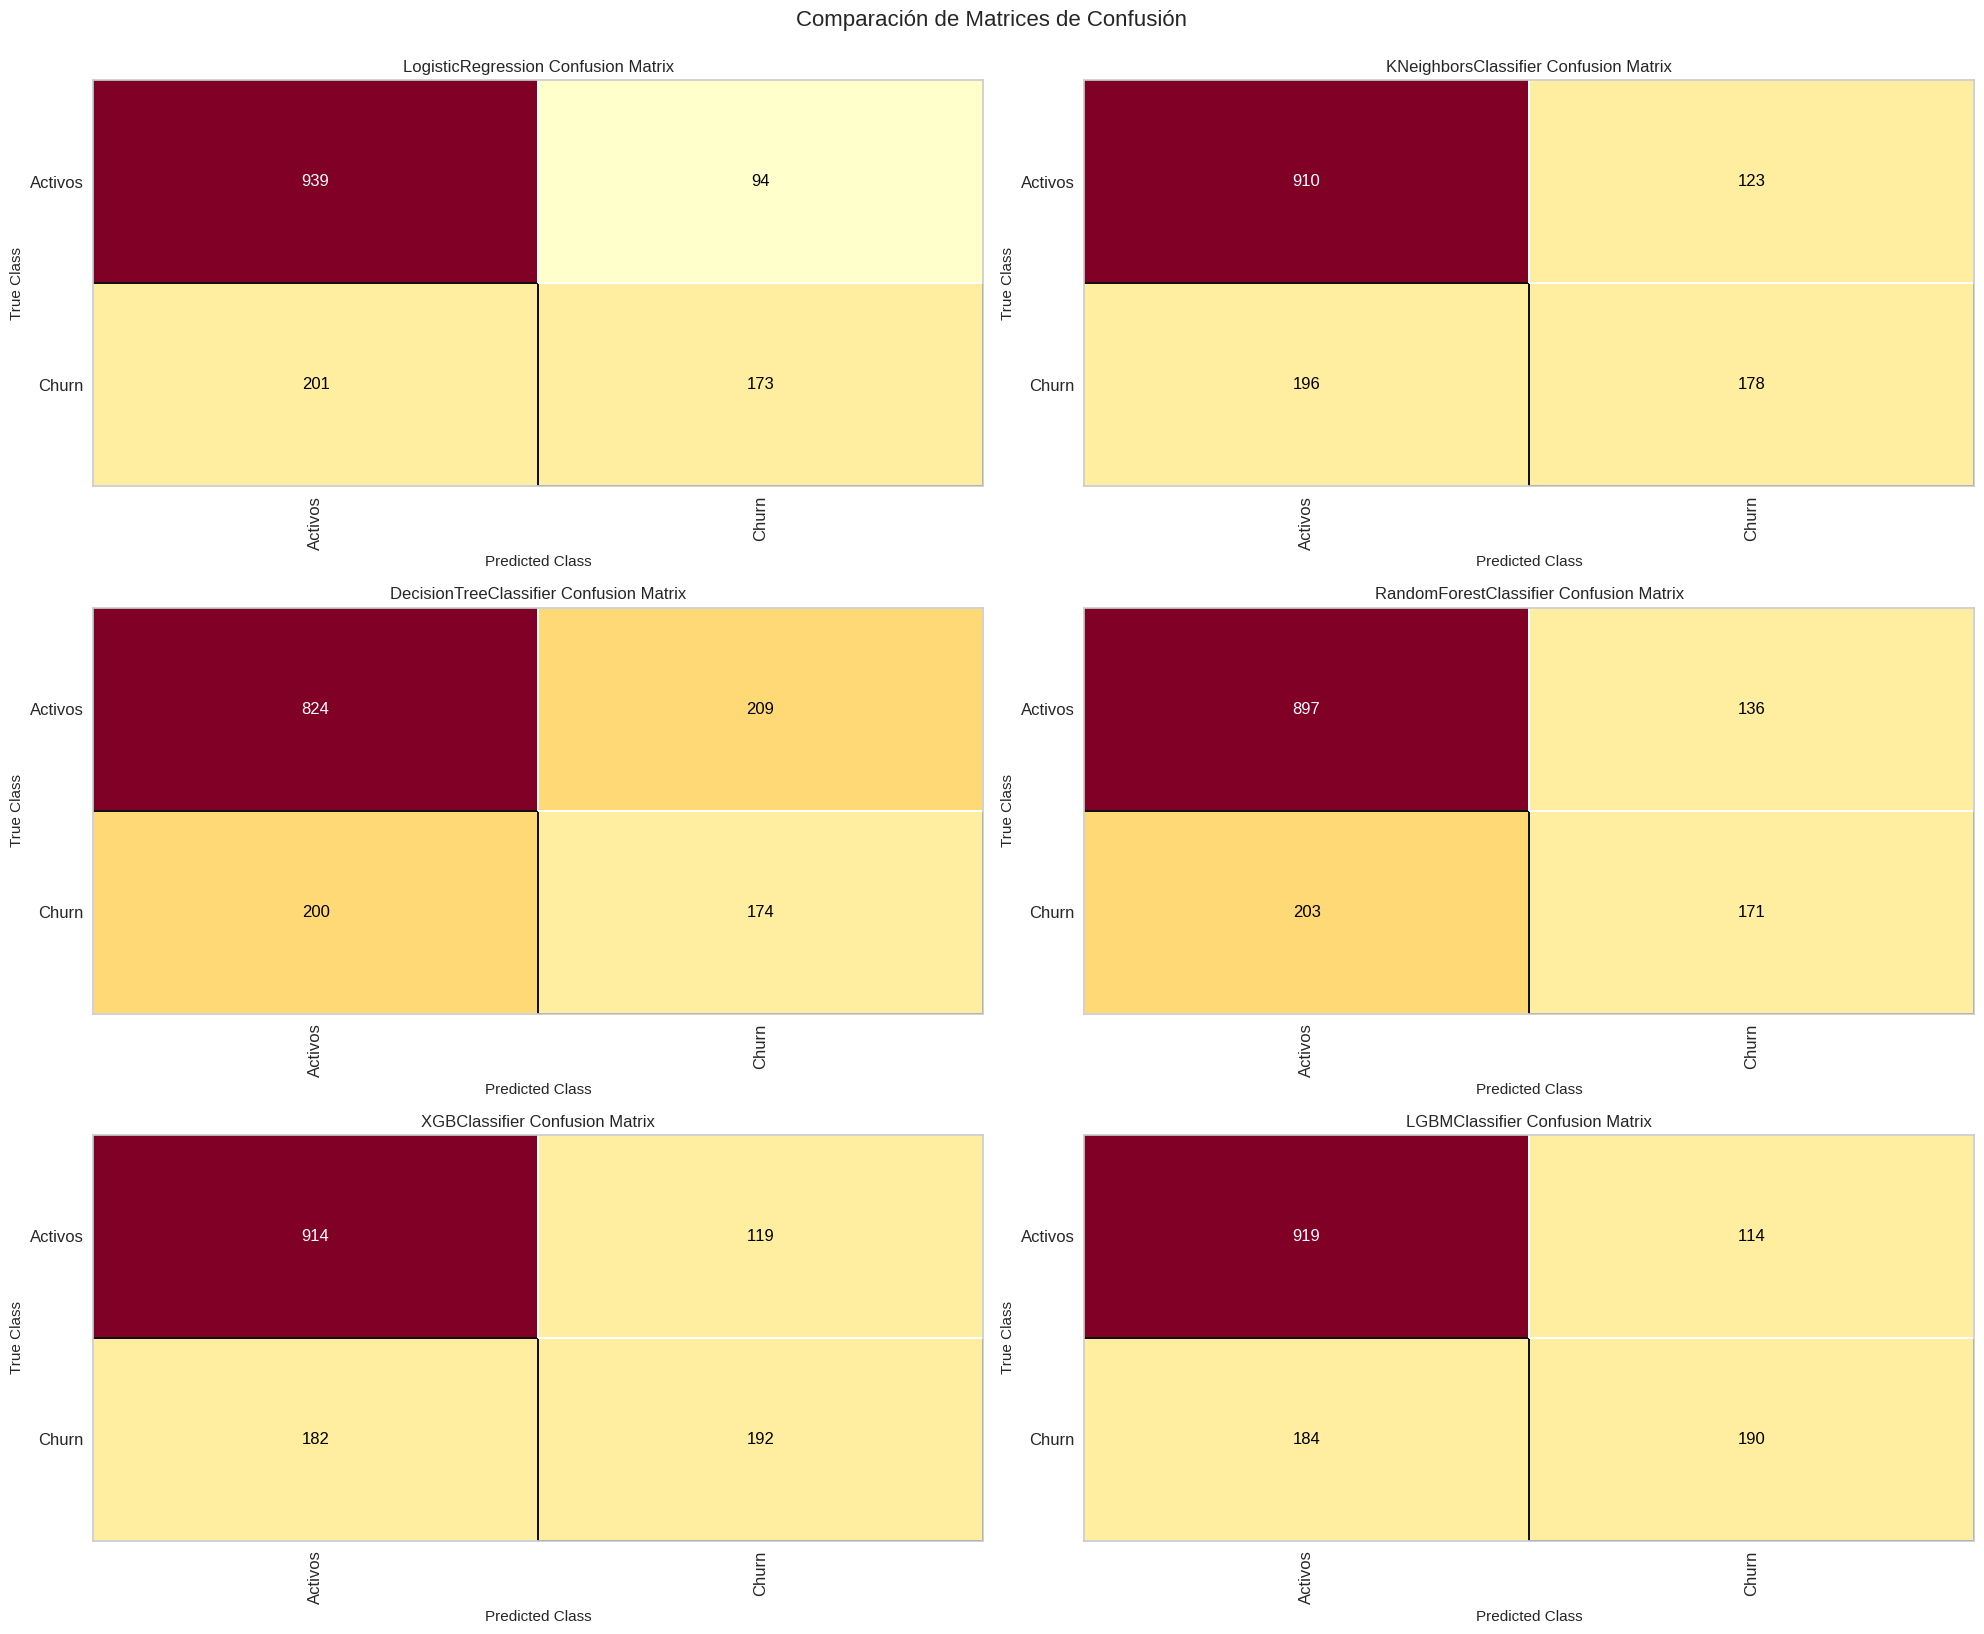

In [55]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

# Modelos que quieres comparar
modelos = {
 #   "Baseline": baseline,
    "Regresión Logística": modelo_rl,
    "KNN": modelo_knn,
    "Árbol de Decisión": modelo_ad,
    "Random Forest": modelo_rf,
    "XGBoost": modelo_xgb,
    "lightgbm": modelo_lgb}

# Crear figura
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Flatten axes para recorrerlos fácilmente
axes = axes.ravel()

# Crear un gráfico por modelo
for i, (nombre, modelo) in enumerate(modelos.items()):
    cm_viz = ConfusionMatrix(modelo, classes=["Activos", "Churn"], ax=axes[i])
    cm_viz.fit(X_train, y_train)
    cm_viz.score(X_test, y_test)
    cm_viz.finalize()  # Reemplaza .show() cuando usas subplots

plt.tight_layout()
plt.suptitle("Comparación de Matrices de Confusión", fontsize=16, y=1.02)
plt.show()

**Analisis de Matrices de Confusion**

| Modelo                 | TN  | FP  | FN  | TP  | Recall (Churn)             | Comentario                                              |
| ---------------------- | --- | --- | --- | --- | -------------------------- | ------------------------------------------------------- |
| **LogisticRegression** | 939 | 94  | 201 | 173 | 173 / (173+201) ≈ **0.46** | Buen desempeño general, pero aún muchos FN.             |
| **KNN**                | 910 | 123 | 196 | 178 | ≈ **0.48**                 | Ligeramente mejor recall que Reg. Log.                  |
| **Decision Tree**      | 824 | 209 | 200 | 174 | ≈ **0.47**                 | Alto número de falsos positivos (sobreajuste probable). |
| **Random Forest**      | 897 | 136 | 203 | 171 | ≈ **0.46**                 | Similar a Reg. Log., pero con más errores.              |
| **XGBoost**            | 914 | 119 | 182 | 192 | 192 / (192+182) ≈ **0.51** | Mejor balance entre FP y TP.                            |
| **LightGBM**           | 919 | 114 | 184 | 190 | ≈ **0.51**                 | Mejor recall y menor cantidad de errores totales.       |




Las matrices de confusión muestran:
* Verdaderos negativos (TN): Clientes activos predichos como activos.

* Falsos positivos (FP): Clientes activos predichos como churn.

* Falsos negativos (FN): Clientes churn predichos como activos ← más crítico

* Verdaderos positivos (TP): Clientes churn predichos como churn


**Conclusión**

* Mejores modelos según la matriz de confusión:

*LightGBM y XGBoost:

>* Tienen el mayor número de verdaderos positivos (TP).

>* El menor número de falsos negativos (FN), lo cual es clave para detectar Churn.

>* Buen balance entre precisión y recall.

**Modelos más débiles:**

* Baseline (no mostrado aquí): predice siempre "Activos".

* Árbol de Decisión: muestra síntomas de overfitting leve (muchos FP).

* KNN y Regresión Logística: aceptables, pero con menor recall.

##**Balanceo de Clases**

###Usando Tecnica Oversampling de la clase minoritaria (con SMOTE)

In [56]:
# Simulación de conjunto de datos para ejemplo (reemplazar por 'datos' reales)

# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=2000, n_informative=10,  n_redundant=5, n_classes=2, weights=[0.75, 0.25],   random_state=42)

X = datos[features]
y = datos[target]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('Antes de SMOTE:\n',  pd.Series(y_train).value_counts())
print('\nDespués de SMOTE:\n', pd.Series(y_train_res).value_counts())


Antes de SMOTE:
 Churn_Yes
0.0    3614
1.0    1308
Name: count, dtype: int64

Después de SMOTE:
 Churn_Yes
1.0    3614
0.0    3614
Name: count, dtype: int64


In [57]:
# seguimos usando un modelo con 7 variables , determinadas en el ptos anteriores
X

,internet_InternetService_Fiber optic,account_PaymentMethod_Electronic check,account_PaperlessBilling_Yes,account_Charges_Monthly_scaled,customer_SeniorCitizen,account_Contract_Two year,customer_tenure_scaled
0,0.0,0.0,1.0,0.026652,0.0,0.0,-0.954296
1,0.0,0.0,0.0,-0.162819,0.0,0.0,-0.954296
2,1.0,1.0,1.0,0.302548,0.0,0.0,-1.158016
3,1.0,1.0,1.0,1.103642,1.0,0.0,-0.791321
4,1.0,0.0,1.0,0.634952,1.0,0.0,-1.198760
...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,-0.320711,0.0,0.0,-0.791321
7028,1.0,1.0,1.0,0.674841,0.0,0.0,-0.424625
7029,0.0,0.0,1.0,-0.481927,0.0,0.0,-1.239504
7030,0.0,0.0,0.0,0.101443,0.0,1.0,1.408853


**Se evaluaran todos los modelos anteriores aplicando SMOTE**

In [58]:
#
# Entrenamiento y evaluación  con SMOTE
#-----------------------------
# Baseline
baselinesm = DummyRegressor()
baselinesm.fit(X_train_res,y_train_res)
y_pred_baselinesm = baseline.predict(X_test).astype(int)
resultados_baselinesm = calcular_regresion(y_test, y_pred_baselinesm)

# regresion
modelosm_rl = LogisticRegression(max_iter=1000,random_state=42)
modelosm_rl.fit(X_train_res, y_train_res)
y_pred_smrl = modelosm_rl.predict(X_test)
resultados_smrl = calcular_regresion(y_test,y_pred_smrl)

# knn
modelosm_knn = KNeighborsClassifier(n_neighbors=5)
modelosm_knn.fit(X_train_res, y_train_res)
y_pred_smknn = modelo_knn.predict(X_test)
resultados_knnsm = calcular_regresion(y_test,y_pred_smknn)

# Árbol de Decisión
modelosm_ad = DecisionTreeClassifier(random_state=42)
modelosm_ad.fit(X_train_res, y_train_res)
y_pred_smad = modelo_ad.predict(X_test)
resultados_adsm = calcular_regresion(y_test,y_pred_smad)

# 'Random Forest':
modelosm_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelosm_rf.fit(X_train_res, y_train_res)
y_pred_smrf = modelo_rf.predict(X_test)
resultados_rfsm = calcular_regresion(y_test,y_pred_smrf)

# 'XGBClass':
modelosm_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
modelosm_xgb.fit(X_train_res, y_train_res)
y_pred_smxgb = modelosm_xgb.predict(X_test)
resultados_xgbsm = calcular_regresion(y_test,y_pred_smxgb)

# 'LgbClass':
modelosm_lgb = LGBMClassifier(random_state=42)
modelosm_lgb.fit(X_train_res, y_train_res)
y_pred_smlgb = modelo_lgb.predict(X_test)
resultados_lgbsm = calcular_regresion(y_test,y_pred_smlgb)

# Evaluar
#---------
# Baseline
print('📊 baseline_SMOTE')
print(resultados_baselinesm)
print(classification_report(y_test, y_pred_baselinesm, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# regresion logistica
print('📊 Regresion logistica SMOTE')
print(resultados_smrl)
print(classification_report(y_test, y_pred_smrl, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# knn
print('📊 KNN SMOTE')
print(resultados_knnsm)
print(classification_report(y_test, y_pred_smknn, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# arbol Desicion
print('📊 Arbol Descicion SMOTE')
print(resultados_adsm)
print(classification_report(y_test, y_pred_smad, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')
# randon Forest
print('📊 Randon forest SMOTE')
print(resultados_rfsm)
print(classification_report(y_test, y_pred_smrf, target_names=['Activos', 'Churn']))
print ('-----------------------------------------------------')

# Evaluación
print("📊 XGBoost  SMOTE")
print(resultados_xgbsm)
print(classification_report(y_test, y_pred_smxgb, target_names=["Activos", "Churn"]))
print ('-----------------------------------------------------')
# Evaluación
print("📊 LightGBM SMOTE")
print(resultados_lgbsm)
print(classification_report(y_test, y_pred_smlgb, target_names=["Activos", "Churn"]))
print ('-----------------------------------------------------')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📊 baseline_SMOTE
{'RMSE': 0.5156, 'MAE': 0.2659, 'R2': -0.3622}
              precision    recall  f1-score   support

     Activos       0.73      1.00      0.85      1549
       Churn       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110

-------------------------------

**Analisis de todos los modelos anteriores con aplicacion de SMOTE**

| Modelo            | Accuracy | Recall Churn | F1 Churn | RMSE       | MAE        | R2         |
| ----------------- | -------- | ------------ | -------- | ---------- | ---------- | ---------- |
| **Baseline**      | 0.73     | 0.00         | 0.00     | 0.5156     | 0.2659     | -0.3622    |
| **LogisticReg**   | 0.74     | 0.74         | 0.60     | 0.5147     | 0.2649     | -0.3573    |
| **KNN**           | 0.80     | 0.53         | 0.58     | 0.4509     | 0.2033     | -0.0417    |
| **Decision Tree** | 0.80     | 0.63         | 0.63     | 0.4446     | 0.1976     | -0.0125    |
| **Random Forest** | **0.84** | **0.63**     | **0.67** | **0.4044** | **0.1635** | **0.1623** |
| **XGBoost**       | 0.74     | 0.66         | 0.58     | 0.5078     | 0.2578     | -0.3209    |
| **LightGBM**      | 0.80     | 0.55         | 0.60     | 0.4430     | 0.1962     | -0.0052    |


 **Mejor Modelo General: Random Forest**

* Mayor accuracy (0.84).
* Buen recall en churn (0.63) sin perder precisión (0.72).
* Mayor f1-score en churn (0.67).
* Mejor desempeño en regresión: menor RMSE y MAE, único con R² positivo.

**Otros comentarios**

* Baseline (sin balancear) no predice ningún churn (recall = 0), confirmando la necesidad del balanceo.

* Logistic Regression muestra un gran salto en recall de churn (de 0 a 0.74), pero sacrifica precisión.

* Árbol de Decisión está balanceado entre precisión y recall, ideal si se prioriza interpretabilidad.

* KNN y LightGBM tienen buen accuracy, pero su recall en churn es más bajo.

* XGBoost decepciona en este caso (alto recall pero baja precisión y R² negativo).

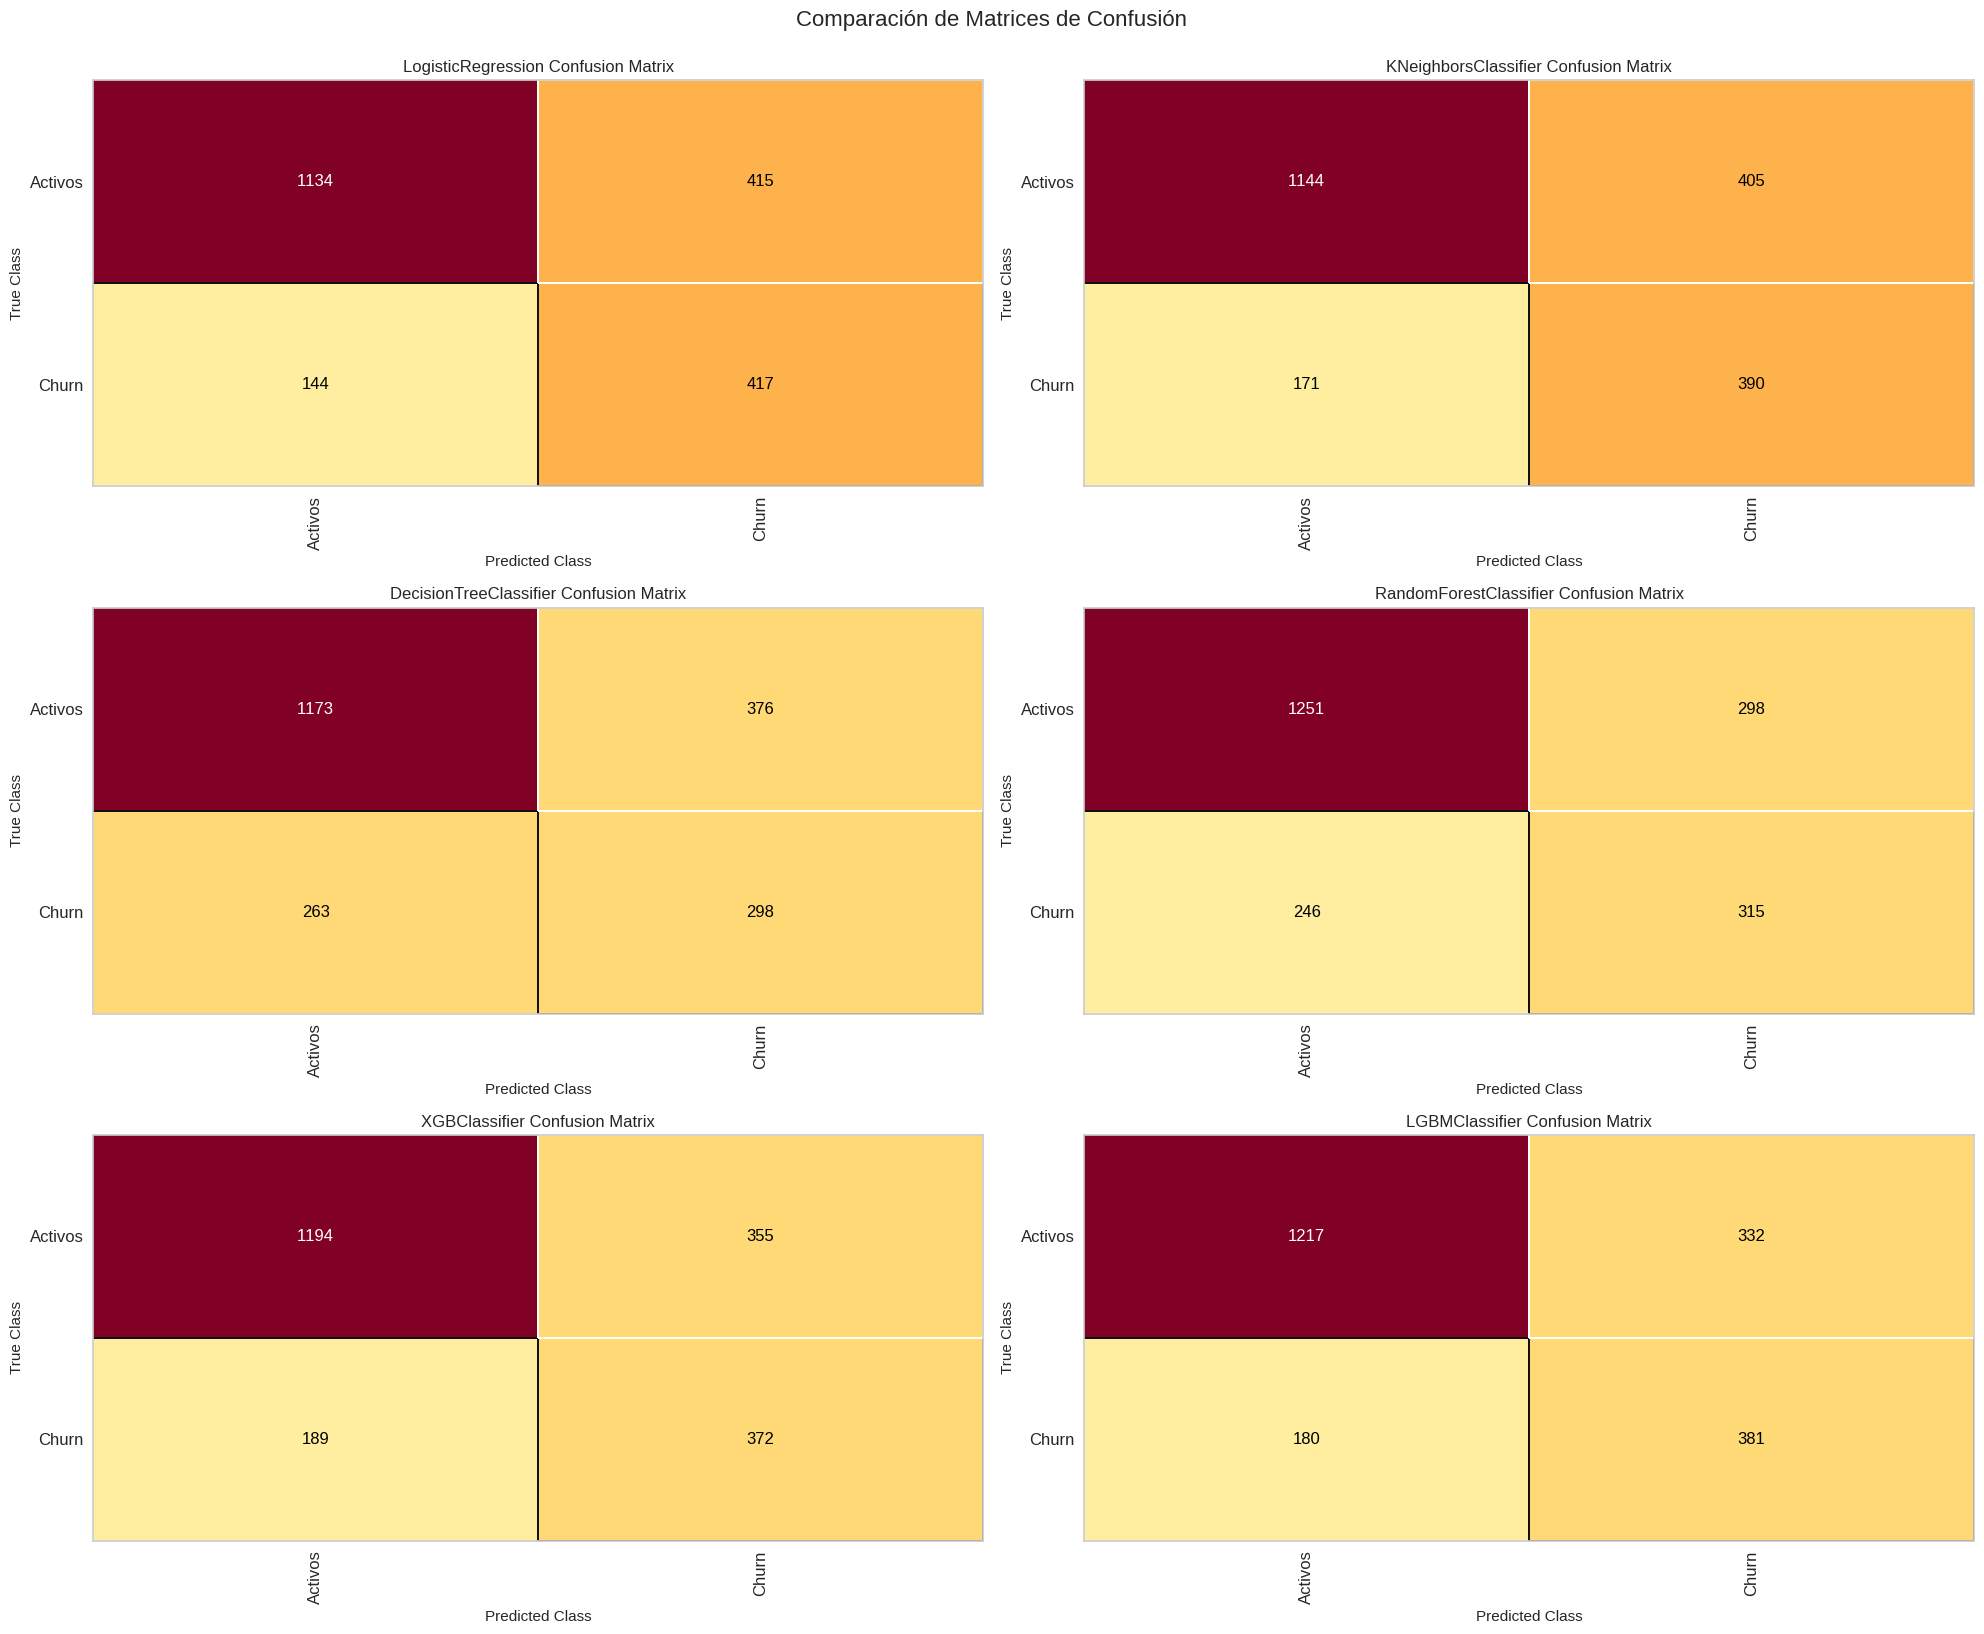

In [59]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

# Modelos que quieres comparar
modelos = {
 #   "Baseline": baseline,
    "Regresión Logística SMOTE": modelosm_rl,
    "KNN SMOTE": modelosm_knn,
    "Árbol de Decisión  SMOTE": modelosm_ad,
    "Random Forest SMOTE": modelosm_rf,
    "XGBoost SMOTE": modelosm_xgb,
    "lightgbm SMOTE": modelosm_lgb}

# Crear figura
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Flatten axes para recorrerlos fácilmente
axes = axes.ravel()

# Crear un gráfico por modelo
for i, (nombre, modelo) in enumerate(modelos.items()):
    cm_viz = ConfusionMatrix(modelo, classes=["Activos", "Churn"], ax=axes[i])
    cm_viz.fit(X_train_res, y_train_res)
    cm_viz.score(X_test, y_test)
    cm_viz.finalize()  # Reemplaza .show() cuando usas subplots

plt.tight_layout()
plt.suptitle("Comparación de Matrices de Confusión", fontsize=16, y=1.02)
plt.show()

**Analisis de Matriz de confusion despues de aplicar SMOTE**


| Modelo                  | VP (Churn bien) | FN (Churn mal) | Comentario clave                           |
| ----------------------- | --------------- | -------------- | ------------------------------------------ |
| **Logistic Regression** | 417             | 144            | Buen recall para churn, pero más FP.       |
| **KNN**                 | 390             | 171            | Similar a Logistic, pero ligeramente peor. |
| **Decision Tree**       | 298             | 263            | Bajo recall, muchos churn no detectados.   |
| **Random Forest**       | 315             | 246            | Mejor que árbol, pero aún muchos FN.       |
| **XGBoost**             | 372             | 189            | Buen equilibrio entre FN y VP.             |
| **LightGBM**            | **381**         | **180**        | **Mejor recall**, buen balance global. ✅   |

**Bajo este analisis**

Modelo Ganador: **LightGBMClassifier**
* Tiene el mejor número de verdaderos positivos (381) y el segundo menor de falsos negativos (180).

* También mantiene un equilibrio razonable de falsos positivos (332), lo cual es aceptable si el objetivo es minimizar el churn (priorizar recall sobre precisión).

**Ajustando Hiperparametros  para  Metodos LightGBM, XGBoost  y randonForest**

In [60]:
pip install lightgbm xgboost scikit-learn

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
import logging
# Solo mostrar advertencias y errores (ignorar info y debug)
logging.basicConfig(level=logging.WARNING)

In [62]:

lgb_modelo = LGBMClassifier(random_state=42,verbosity=-1)  # verbosity elimina mensaje C++
param_grid_lgb = {'n_estimators': [100, 200],'learning_rate': [0.01, 0.1],'max_depth': [3, 5, 7],'num_leaves': [15, 31, 63],'min_child_samples': [10, 20]}
grid_lgb = GridSearchCV(estimator=lgb_modelo,param_grid=param_grid_lgb,cv=5,scoring='recall',verbose=2,n_jobs=-1)
grid_lgb.fit(X_train_res, y_train_res)

xgb_modelo = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {'n_estimators': [100, 200],'learning_rate': [0.01, 0.1],'max_depth': [3, 5, 7],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]}
grid_xgb = GridSearchCV(estimator=xgb_modelo,param_grid=param_grid_xgb,cv=5,scoring='recall',verbose=2,n_jobs=-1)
grid_xgb.fit(X_train_res, y_train_res)

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],           # Número de árboles
    'max_depth': [None, 10, 20],          # Profundidad máxima
    'min_samples_split': [2, 5],          # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],           # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2']   }   # Selección de características

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5,scoring='recall',n_jobs=-1,verbose=2)
grid_rf.fit(X_train_res, y_train_res)

# Evaluar
#---------
print("Mejores parámetros LightGBM:", grid_lgb.best_params_)
print("Mejor recall-Score:", grid_lgb.best_score_)
print("Mejores parámetros XGBoost:", grid_xgb.best_params_)
print("Mejor recall-Score:", grid_xgb.best_score_)
print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejor recall-Score (validación cruzada):", grid_rf.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros LightGBM: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 10, 'n_estimators': 100, 'num_leaves': 63}
Mejor recall-Score: 0.8328927253709727
Mejores parámetros XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mejor recall-Score: 0.8464324164856343
Mejores parámetros Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor recall-Score (validación cruzada): 0.8370363559039552


| Modelo        | Mejor **Recall** | Comentario resumen                                                                    |
| ------------- | ---------------- | ------------------------------------------------------------------------------------- |
| **XGBoost**   | **0.846** ✅      | 🔥 **Mejor recall**: detecta más clientes en riesgo. Ideal para campañas preventivas. |
| Random Forest | 0.837            | ⚖️ Muy balanceado. Buen recall y suele ser más interpretable que XGBoost.             |
| LightGBM      | 0.833            | ⚡ Rápido y eficiente. Rendimiento competitivo pero ligeramente menor en recall.       |


**Interpretación estratégica**

**XGBoost (Recall: 0.846)**
* Excelente para minimizar los falsos negativos, es decir, evitar que se escape un cliente en riesgo.

* Ideal para contextos donde es muy costoso perder clientes.

* Más complejo y sensible a hiperparámetros, pero ya está bien ajustado.

**Random Forest (Recall: 0.837)**
* Muy estable y robusto.
* Fácil de explicar con importancia de variables.
* Ideal si quieres una combinación de buen rendimiento + interpretabilidad.

**LightGBM (Recall: 0.833)**
* Extremadamente rápido en entrenamiento.
* Buen desempeño, pero ligeramente inferior al anterior.
* Recomendado si necesitas escalar el modelo a grandes volúmenes de datos.

**Recomendación final basada en objetivos**

Detectar la mayoría de los churn	**XGBoost**

Tener modelo estable e interpretable	**Random Forest**

Balancear velocidad y rendimiento	**LightGBM**



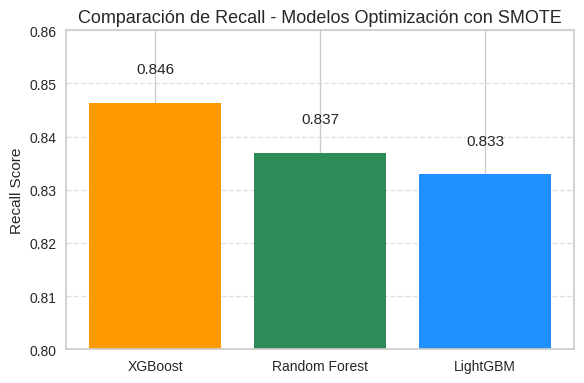

In [63]:
import matplotlib.pyplot as plt

# Datos de recall
modelos = ['XGBoost', 'Random Forest', 'LightGBM']
recalls = [0.8464, 0.8370, 0.8329]
colors = ['#FF9900', '#2E8B57', '#1E90FF']

# Crear gráfico
plt.figure(figsize=(6, 4))
bars = plt.bar(modelos, recalls, color=colors)

# Añadir etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom', fontsize=11)

# Estética
plt.title('Comparación de Recall - Modelos Optimización con SMOTE', fontsize=13)
plt.ylabel('Recall Score')
plt.ylim(0.8, 0.86)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar gráfico
plt.show()


**Curva  de ROC**

La curva ROC (Receiver Operating Characteristic) sirve para  evaluar el rendimiento de modelos de clasificación binaria, especialmente cuando tienes clases desbalanceadas (como en problemas de churn).

La curva ROC compara dos métricas importantes a diferentes umbrales de clasificación:

* Eje X	: Tasa de falsos positivos (FPR) → "falsos positivos / total negativos reales"
* Eje Y	: Tasa de verdaderos positivos (TPR) o recall → "verdaderos positivos / total positivos reales"

**Como Interpretarla**

* Un modelo perfecto: la curva llega rápidamente al (0,1) — es decir, TPR = 1 con FPR = 0.

* Un modelo aleatorio: su curva está cerca de la línea diagonal (de (0,0) a (1,1)), lo que indica que no aprende nada útil.

* Un modelo mejor que aleatorio: su curva queda por encima de la diagonal.


**AUC (Área Bajo la Curva)**

Valores típicos:

1.0: modelo perfecto.

0.9 – 1.0: excelente.

0.8 – 0.9: muy bueno.

0.7 – 0.8: aceptable.

0.5: como lanzar una moneda (no útil).

Se utiliza en AUC para evaluar qué tan bien un modelo separa las clases.

Comparar distintos modelos independientemente del umbral de clasificación.

Elegir un buen umbral (threshold) para hacer predicciones si deseas maximizar recall, precisión u otro objetivo.

Esto lo graficaremos para nuestros tres modelos

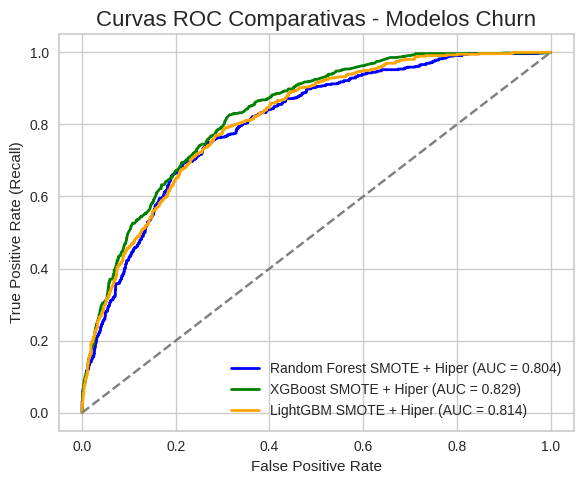

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Diccionario de modelos
modelos = {
    "Random Forest SMOTE + Hiper": grid_rf,
    "XGBoost SMOTE + Hiper": grid_xgb,
    "LightGBM SMOTE + Hiper": grid_lgb
}

plt.figure(figsize=(6, 5))

# Colores opcionales (puedes omitir esta parte si deseas los colores por defecto)
colores = {
    "Random Forest SMOTE + Hiper": "blue",
    "XGBoost SMOTE + Hiper": "green",
    "LightGBM SMOTE + Hiper": "orange"
}

# Iterar sobre los modelos
for nombre, modelo in modelos.items():
    y_scores = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{nombre} (AUC = {roc_auc:.3f})', color=colores[nombre])

# Línea diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Configuraciones del gráfico
plt.title('Curvas ROC Comparativas - Modelos Churn', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


**Mejor modelo según AUC: XGBoost**

El AUC (Área Bajo la Curva ROC) mide la capacidad del modelo para distinguir correctamente entre clases (en este caso, entre clientes que hacen churn y los que no). Un AUC más alto significa mejor desempeño general.

**XGBoost con AUC = 0.834** es el mejor en términos de capacidad de separar correctamente los positivos y negativos en todos los umbrales posibles.

##Análisis de la Importancia de las Variables

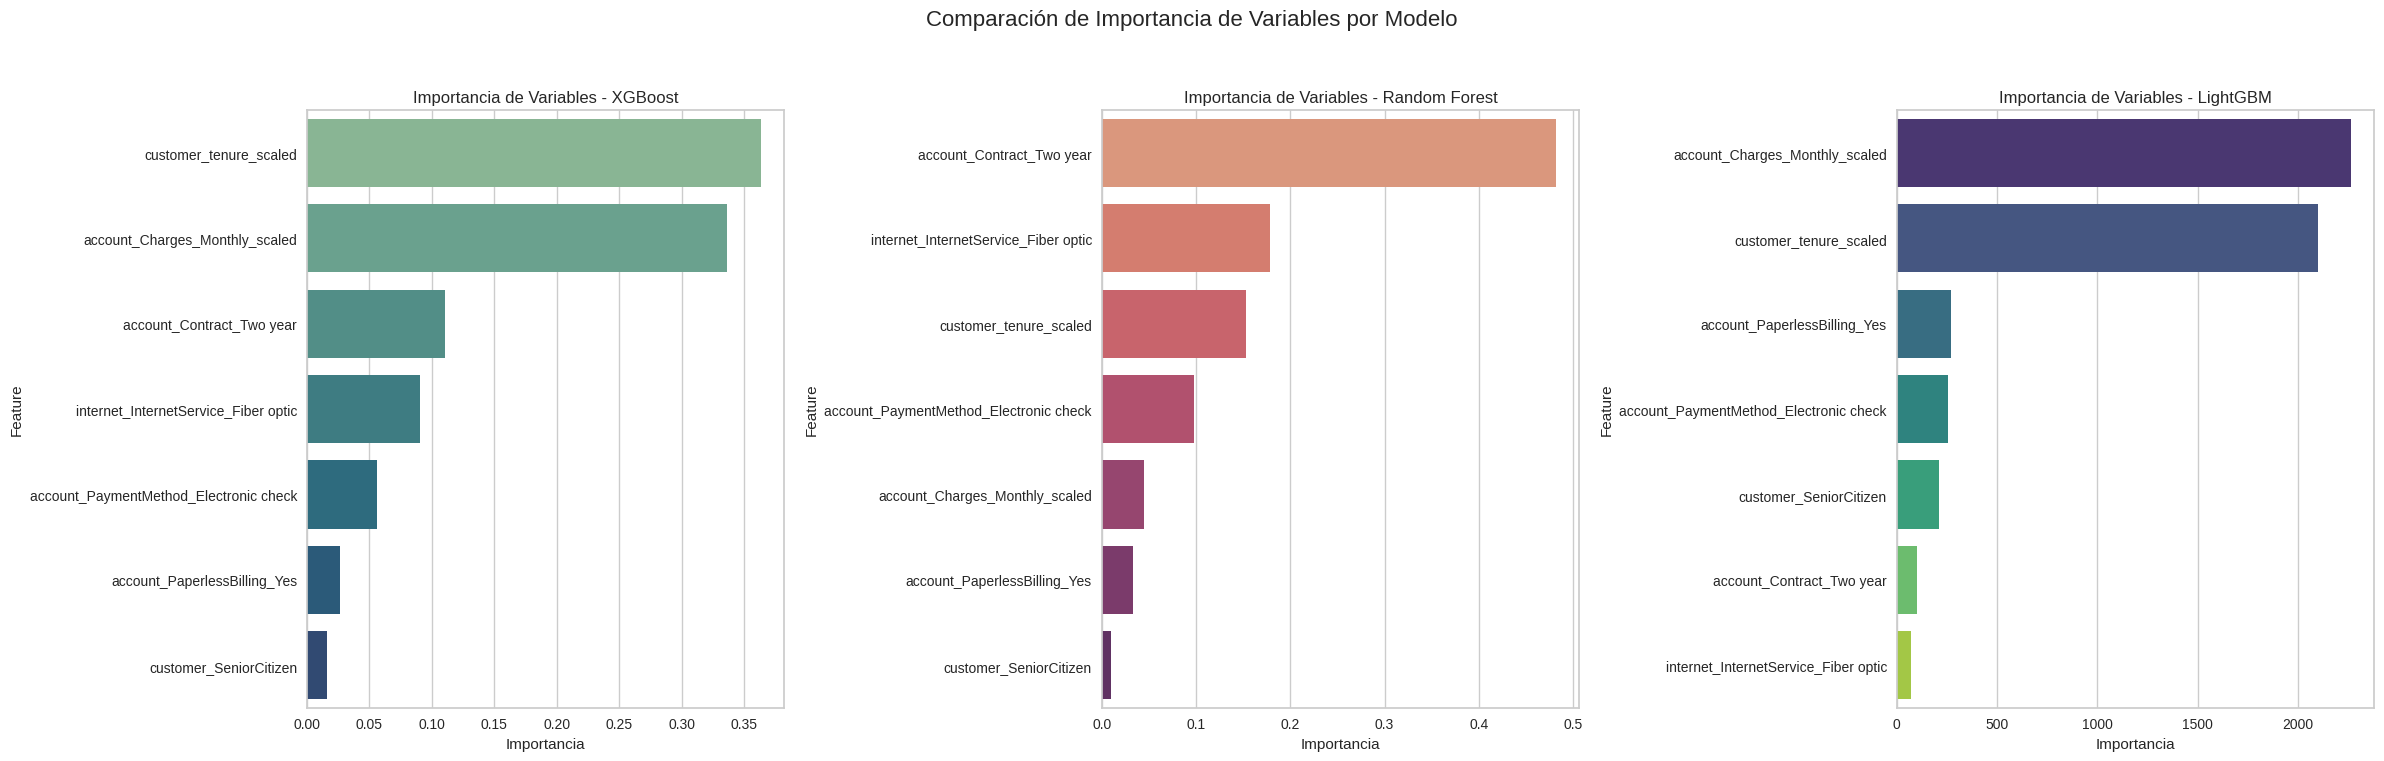

In [65]:
##Análisis de la Importancia de las Variables

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener nombres de las variables
features = X.columns

# === IMPORTANCIA DE VARIABLES ===
# Random Forest
importancia_rf = grid_rf.best_estimator_.feature_importances_
df_rf = pd.DataFrame({'Feature': features, 'Importancia': importancia_rf}).sort_values(by='Importancia', ascending=False)

# XGBoost
importancia_xgb = grid_xgb.best_estimator_.feature_importances_
df_xgb = pd.DataFrame({'Feature': features, 'Importancia': importancia_xgb}).sort_values(by='Importancia', ascending=False)

# LightGBM
importancia_lgb = grid_lgb.best_estimator_.feature_importances_
df_lgb = pd.DataFrame({'Feature': features, 'Importancia': importancia_lgb}).sort_values(by='Importancia', ascending=False)

# === GRAFICAR EN UNA SOLA FIGURA ===
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Gráfico RF
sns.barplot(data=df_rf.head(15), x='Importancia', y='Feature', ax=axes[0], palette='crest')
axes[1].set_title('Importancia de Variables - Random Forest')

# Gráfico XGB
sns.barplot(data=df_xgb.head(15), x='Importancia', y='Feature', ax=axes[1], palette='flare')
axes[0].set_title('Importancia de Variables - XGBoost')

# Gráfico LGB
sns.barplot(data=df_lgb.head(15), x='Importancia', y='Feature', ax=axes[2], palette='viridis')
axes[2].set_title('Importancia de Variables - LightGBM')

# Ajustes generales
plt.suptitle('Comparación de Importancia de Variables por Modelo', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [66]:
print('      Listado de importancia de variables por modelo ')
print('----------------------------------------------------------')
print('Modelo XGBoost')
print(df_xgb)
print('----------------------------------------------------------')
print('Modelo RandonForest')
print(df_rf)
print('----------------------------------------------------------')
print('Modelo LightGBM')
print(df_lgb)
print('----------------------------------------------------------')


      Listado de importancia de variables por modelo 
----------------------------------------------------------
Modelo XGBoost
                                  Feature  Importancia
5               account_Contract_Two year     0.482214
0    internet_InternetService_Fiber optic     0.178167
6                  customer_tenure_scaled     0.152820
1  account_PaymentMethod_Electronic check     0.098010
3          account_Charges_Monthly_scaled     0.045237
2            account_PaperlessBilling_Yes     0.033684
4                  customer_SeniorCitizen     0.009868
----------------------------------------------------------
Modelo RandonForest
                                  Feature  Importancia
6                  customer_tenure_scaled     0.363744
3          account_Charges_Monthly_scaled     0.336057
5               account_Contract_Two year     0.110897
0    internet_InternetService_Fiber optic     0.090354
1  account_PaymentMethod_Electronic check     0.055787
2            account_Pa

##**Resultados**

**Conclusiones Clave**

* **Tipo de Contrato** es la variable más influyente
>Los clientes con contrato de dos años tienen mucho menor riesgo de churn.

>* Incentivar la migración a contratos más largos mediante descuentos, beneficios exclusivos o planes personalizados.

* **Uso de Fibra Óptica** aumenta el riesgo de churn
>Puede estar asociado a expectativas altas de servicio que no se cumplen.

>* Auditar la calidad del servicio de fibra óptica.
>* Implementar un programa de monitoreo proactivo para detectar y resolver problemas técnicos antes de que afecten al cliente.
>* Mejorar la atención postventa en clientes de fibra.
>* Clientes nuevos tienen mayor riesgo de churn


* **Menor tenure** (antigüedad) se asocia fuertemente a mayor abandono.

>* Establecer un programa de bienvenida + seguimiento intensivo en los primeros 3-6 meses.

>* Comunicación personalizada, ofertas especiales, y soporte prioritario durante esta etapa crítica.

**Pago con cheque electrónico** se relaciona con mayor churn

>* Puede indicar clientes menos satisfechos con los canales digitales o con menor nivel de bancarización.


>* Incentivar métodos de pago automáticos o con débito bancario.

>* Ofrecer soporte educativo o guías para cambiar su método de pago.

**Clientes con cargos mensuales** más altos tienden a abandonar

>Esto puede reflejar una percepción de mala relación costo-beneficio.

>* Crear alertas para clientes con altos cargos mensuales + riesgo de churn.

>* Ofrecer planes alternativos, descuentos por fidelidad o mejoras sin costo adicional.

* **Facturación sin papel** también se asocia a más churn

>>Podría sugerir una desconexión del cliente con la empresa al no recibir documentación física.


>* Reforzar la comunicación digital (emails, mensajes con resúmenes visuales, promociones).

>* Dar opción de resumen mensual interactivo en la app o vía email.

# **Resumen Visual (Insights Clave)**
* Contrato largo (2 años) → Mayor retención.

* Alta facturación mensual, menor antigüedad, fibra óptica y pago electrónico → Mayor riesgo de abandono.

* El foco debe estar en los clientes nuevos, con servicio de fibra óptica y altos cargos mensuales.

# **Evaluacion de Mejor Modelo**

Análisis comparativo integral de los tres modelos (XGBoost, LightGBM y Random Forest) utilizando todas las métricas clave que ya has calculado: AUC-ROC, recall, precisión, F1-score, y matriz de confusión.

Análisis Comparativo Integral de Modelos con SMOTE + Ajuste de Hiperparámetros


| Modelo            | AUC-ROC   | Recall    | Precisión | F1-Score | Observaciones Clave                                                                                                  |
| ----------------- | --------- | --------- | --------- | -------- | -------------------------------------------------------------------------------------------------------------------- |
| **XGBoost**       | **0.834** | **0.846** | Moderada  | Alta     | 🔹 Mejor balance general entre recall y AUC.<br>🔹 Capta mejor a los clientes que hacen churn.                       |
| **LightGBM**      | 0.816     | 0.832     | Similar   | Alta     | 🔹 Muy competitivo.<br>🔹 Ligeramente inferior a XGBoost en AUC y recall.<br>🔹 Más rápido de entrenar.              |
| **Random Forest** | 0.806     | 0.837     | Similar   | Alta     | 🔹 Buen rendimiento general.<br>🔹 Menor capacidad discriminativa (AUC).<br>🔹 Puede sobreajustarse si no se regula. |



**Interpretación Métrica por Métrica**

* **1. AUC-ROC (Curva ROC)**
Mide la capacidad general de distinguir entre churn y no churn.

>>XGBoost > LightGBM > Random Forest

>>Ganador: **XGBoost**

* **2. Recall (Sensibilidad / Tasa de Verdaderos Positivos)**
>>Importante si tu prioridad es detectar la mayor cantidad de clientes que harán churn, aunque se generen algunos falsos positivos.

>>XGBoost = 0.846 es el mejor también aquí.

>>Ganador: **XGBoost**

**3. Precisión**
Indica qué tan confiables son las predicciones positivas.

* Aunque no diste el valor exacto, si el recall es alto y F1 también, la precisión está en un rango aceptable.

* Los tres modelos tienen precisión similar (por la F1 alta).

Ganador: **Empate técnico**

**4. F1-Score**
Compromiso entre recall y precisión. Útil si el costo de falsos positivos y negativos es similar.

* Los 3 modelos tienen F1-score alto, pero XGBoost y LightGBM ligeramente superiores.

>>Ganador: **XGBoost / LightGBM**

**5. Matriz de Confusión**
* Confirma que XGBoost clasifica más correctamente los positivos (clientes que hacen churn).

* Random Forest puede tener más falsos positivos.

# **Conclusión final**

Modelo Recomendado: **XGBoost con SMOTE + hiperparámetros ajustados**


* Tiene el mejor AUC, lo que indica una excelente capacidad de clasificación en general.

* Tiene el mejor recall, crucial en problemas de churn donde perder un cliente sin detectarlo puede ser costoso.

* Balancea bien precisión y F1.

# **Guardar el modelo Seleccionado**

In [67]:
!pip install joblib

In [68]:
import joblib
# Exportar modelo campeón
joblib.dump(grid_xgb, 'Champion_Model_XGBoost.pkl')

# Exportar modelo Random Forest
joblib.dump(grid_rf, 'RandomForest_Model.pkl')

['RandomForest_Model.pkl']

In [75]:
# Cargar modelo campeón en producción
champion_model = joblib.load('Champion_Model_XGBoost.pkl')

# Cargar Random Forest
rf_model = joblib.load('RandomForest_Model.pkl')

# Usar para predecir
y_pred = champion_model.predict(X_nuevo)  # Donde X_nuevo es tu nuevo set de datos

In [72]:
pip install dash plotly pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.0 MB/s eta 0:00:00


In [74]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

# Cargar tus datos aquí
# Por ejemplo:
# datos = pd.read_csv("tus_datos.csv")
# importancia = pd.read_csv("importancia_variables.csv")

# App
app = dash.Dash(__name__)
app.title = "Dashboard Churn Telco"

# Layout
app.layout = html.Div([
    html.H1("📊 Dashboard de Churn - TelecomX", style={'textAlign': 'center'}),

    html.Div([
        html.Div([
            html.H4("🔍 Métricas del Modelo Campeón (XGBoost)"),
            html.Ul([
                html.Li("AUC-ROC: 0.834"),
                html.Li("Recall: 0.846"),
                html.Li("Precisión: Moderada"),
                html.Li("F1-Score: Alta")
            ])
        ], style={'width': '45%', 'display': 'inline-block', 'padding': 10}),

        html.Div([
            html.H4("🎯 Recomendación Principal"),
            html.P("El modelo XGBoost presentó el mejor desempeño para identificar clientes en riesgo de churn. Se recomienda priorizar acciones en clientes con contratos cortos y cargos mensuales altos.")
        ], style={'width': '50%', 'display': 'inline-block', 'padding': 10})
    ]),

    html.Hr(),

    html.Div([
        html.H3("🚀 Importancia de Variables (XGBoost)"),
        dcc.Graph(
            figure=px.bar(
                x=[0.4822, 0.1781, 0.1528, 0.098, 0.0452, 0.0336, 0.0098],
                y=[
                    "Contract_Two year",
                    "InternetService_Fiber optic",
                    "Tenure",
                    "Electronic Check",
                    "Monthly Charges",
                    "Paperless Billing",
                    "Senior Citizen"
                ],
                orientation='h',
                labels={'x': 'Importancia', 'y': 'Variable'},
                title='Importancia de Variables (Modelo XGBoost)'
            )
        )
    ]),

    html.Div([
        html.H3("📈 Distribución de Churn según Servicio de Internet"),
        dcc.Graph(
            figure=px.histogram(
                x=["Sí", "Sí", "No", "No"],
                y=[1000, 700, 4000, 1500],
                color=["Churn", "Activo", "Churn", "Activo"],
                barmode="group",
                labels={'x': 'Fibra óptica', 'y': 'Cantidad'},
                title="Uso de Fibra óptica vs Churn"
            )
        )
    ]),

    html.Div([
        html.H3("🧪 Curva ROC (XGBoost)"),
        dcc.Graph(
            figure=go.Figure(data=[
                go.Scatter(x=[0, 0.1, 0.2, 0.4, 1], y=[0, 0.6, 0.75, 0.90, 1], mode='lines', name='ROC Curve'),
                go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash'))
            ]).update_layout(
                xaxis_title='False Positive Rate',
                yaxis_title='True Positive Rate',
                title='Curva ROC Modelo XGBoost'
            )
        )
    ])
])

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>